In [25]:
import os
import pandas as pd
import re
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add the parent directory to sys.path (the directory containing both 'filtering' and 'stateAnalysis_tools')
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

# Import the necessary function from stateAnalysis_tools
from stateAnalysis_tools.stateAnalysis_tools import calculate_area_from_residues_with_chain

# Function to extract B-factors (pLDDT scores) from a PDB file
def extractBFactor(pdbFile, chainID):
    patternATOM = re.compile(
        r'^ATOM\s+'
        r'\d+\s+'
        r'CA\s+'
        r'([A-Z]{3})\s+'
        + re.escape(chainID) +
        r'\s?(\d+)\s+'
        r'[-+]?\d*\.\d+\s+'
        r'[-+]?\d*\.\d+\s+'
        r'[-+]?\d*\.\d+\s+'
        r'\d*\.\d+\s+'
        r'(\d+\.\d+)'
    )
    bFactors = {}

    with open(pdbFile, 'r') as file:
        for line in file:
            if line.startswith("ATOM") and " CA " in line:
                atomInfo = re.search(patternATOM, line)
                if atomInfo:
                    resName = atomInfo.group(1)
                    resNumber = int(atomInfo.group(2))
                    bFactor = float(atomInfo.group(3))
                    bFactors[resName + ' ' + str(resNumber)] = bFactor

    return bFactors

# Function to calculate the average pLDDT from the extracted B-factors
def calculate_average_plddt(bFactors):
    if not bFactors:
        return None
    return sum(bFactors.values()) / len(bFactors)

# Function to get the model number and rNUMBER from the filename
def extract_model_and_rNumber(filename):
    model_pattern = re.compile(r'_ptm_r(\d+)_')
    recycle_pattern = re.compile(r'_r(\d+)_')
    
    model_match = model_pattern.search(filename)
    recycle_match = recycle_pattern.search(filename)
    
    model = int(model_match.group(1)) if model_match else None
    recycle = int(recycle_match.group(1)) if recycle_match else None
    
    return model, recycle

# Process PDB files
def process_pdb_files(folder, chainID, residues_Up, residues_Down):
    data = []
    
    for filename in os.listdir(folder):
        if filename.endswith(".pdb"):
            pdbFile = os.path.join(folder, filename)
            
            # Extract pLDDT information
            bFactors = extractBFactor(pdbFile, chainID)
            avg_plddt = calculate_average_plddt(bFactors)
            
            # Calculate areas for Up and Down regions
            residue_pairs_up, area_up = calculate_area_from_residues_with_chain(pdbFile, residues_Up, chainID)
            residue_pairs_down, area_down = calculate_area_from_residues_with_chain(pdbFile, residues_Down, chainID)
            
            # Extract model and rNUMBER
            model, rNumber = extract_model_and_rNumber(filename)
            
            if avg_plddt is not None and area_up is not None and area_down is not None:
                data.append({
                    'Filename': filename,
                    'Model': model,
                    'Recycle': rNumber,
                    'Average_pLDDT': avg_plddt,
                    'Area_Up': area_up,
                    'Area_Down': area_down
                })
    
    df = pd.DataFrame(data)
    return df

# Define your residues for Up and Down
residues_Up = [('ASP', 108), ('ASN', 439), ('PHE', 817), ('LEU', 1155)]
residues_Down = [('ILE', 68), ('TYR', 465), ('ILE', 841), ('TYR', 1129)]
chainID = 'A'



In [26]:
# Define the folder containing PDB files
folder_path = '/Users/adrianahernandezgonzalez/LabNotebook/10-24/states/partialAlphaCaV12HS8HLPlocalrun_b3702_32_64_10/pdb'

df = process_pdb_files(folder_path, chainID, residues_Up, residues_Down)

# Save DataFrame to a CSV for later use
df.to_csv('model_recycle_data.csv', index=False)

# Display DataFrame
print(df)


Residue pairs and coordinates:
ASP108 (CA: (25.141, 44.969, -5.879)) to ASN439 (CA: (-28.875, 0.636, -32.844)): Distance = 74.90 Å
ASN439 (CA: (-28.875, 0.636, -32.844)) to PHE817 (CA: (11.641, -39.0, -14.219)): Distance = 59.66 Å
PHE817 (CA: (11.641, -39.0, -14.219)) to LEU1155 (CA: (45.0, 5.605, 0.643)): Distance = 57.65 Å
LEU1155 (CA: (45.0, 5.605, 0.643)) to ASP108 (CA: (25.141, 44.969, -5.879)): Distance = 44.57 Å

Area formed by the residues: 3068.06 square Å

Residue pairs and coordinates:
ILE68 (CA: (0.547, 44.75, 19.5)) to TYR465 (CA: (-49.906, 10.836, -2.164)): Distance = 64.54 Å
TYR465 (CA: (-49.906, 10.836, -2.164)) to ILE841 (CA: (-16.969, -43.062, 7.648)): Distance = 63.92 Å
ILE841 (CA: (-16.969, -43.062, 7.648)) to TYR1129 (CA: (30.328, 9.102, 30.922)): Distance = 74.16 Å
TYR1129 (CA: (30.328, 9.102, 30.922)) to ILE68 (CA: (0.547, 44.75, 19.5)): Distance = 47.83 Å

Area formed by the residues: 3537.94 square Å

Residue pairs and coordinates:
ASP108 (CA: (49.312, 11.711,


Residue pairs and coordinates:
ASP108 (CA: (-18.5, -2.039, -48.438)) to ASN439 (CA: (43.844, -5.656, -9.211)): Distance = 73.75 Å
ASN439 (CA: (43.844, -5.656, -9.211)) to PHE817 (CA: (13.711, 41.688, 15.469)): Distance = 61.31 Å
PHE817 (CA: (13.711, 41.688, 15.469)) to LEU1155 (CA: (-26.0, 34.656, -19.844)): Distance = 53.60 Å
LEU1155 (CA: (-26.0, 34.656, -19.844)) to ASP108 (CA: (-18.5, -2.039, -48.438)): Distance = 47.12 Å

Area formed by the residues: 2176.28 square Å

Residue pairs and coordinates:
ILE68 (CA: (-24.844, -28.953, -27.641)) to TYR465 (CA: (30.453, -38.688, 6.566)): Distance = 65.75 Å
TYR465 (CA: (30.453, -38.688, 6.566)) to ILE841 (CA: (12.609, 20.516, 44.188)): Distance = 72.38 Å
ILE841 (CA: (12.609, 20.516, 44.188)) to TYR1129 (CA: (-42.75, 12.125, -1.146)): Distance = 72.04 Å
TYR1129 (CA: (-42.75, 12.125, -1.146)) to ILE68 (CA: (-24.844, -28.953, -27.641)): Distance = 52.06 Å

Area formed by the residues: 2762.19 square Å

Residue pairs and coordinates:
ASP108 (CA


Residue pairs and coordinates:
ASP108 (CA: (-15.617, 44.375, -26.172)) to ASN439 (CA: (27.953, -14.562, -32.719)): Distance = 73.59 Å
ASN439 (CA: (27.953, -14.562, -32.719)) to PHE817 (CA: (33.875, 0.457, 25.328)): Distance = 60.25 Å
PHE817 (CA: (33.875, 0.457, 25.328)) to LEU1155 (CA: (0.855, 42.062, 17.891)): Distance = 53.63 Å
LEU1155 (CA: (0.855, 42.062, 17.891)) to ASP108 (CA: (-15.617, 44.375, -26.172)): Distance = 47.10 Å

Area formed by the residues: 806.17 square Å

Residue pairs and coordinates:
ILE68 (CA: (-38.938, 17.859, -25.625)) to TYR465 (CA: (-3.693, -36.75, -36.062)): Distance = 65.83 Å
TYR465 (CA: (-3.693, -36.75, -36.062)) to ILE841 (CA: (17.844, -30.438, 31.953)): Distance = 71.62 Å
ILE841 (CA: (17.844, -30.438, 31.953)) to TYR1129 (CA: (-27.25, 24.531, 24.109)): Distance = 71.53 Å
TYR1129 (CA: (-27.25, 24.531, 24.109)) to ILE68 (CA: (-38.938, 17.859, -25.625)): Distance = 51.52 Å

Area formed by the residues: 1170.96 square Å

Residue pairs and coordinates:
ASP10


Residue pairs and coordinates:
ASP108 (CA: (-27.484, -29.547, -33.594)) to ASN439 (CA: (19.25, -34.344, 22.922)): Distance = 73.49 Å
ASN439 (CA: (19.25, -34.344, 22.922)) to PHE817 (CA: (40.281, 14.055, -5.812)): Distance = 60.09 Å
PHE817 (CA: (40.281, 14.055, -5.812)) to LEU1155 (CA: (0.524, 7.09, -43.75)): Distance = 55.39 Å
LEU1155 (CA: (0.524, 7.09, -43.75)) to ASP108 (CA: (-27.484, -29.547, -33.594)): Distance = 47.22 Å

Area formed by the residues: 1812.13 square Å

Residue pairs and coordinates:
ILE68 (CA: (-46.031, -14.578, -8.297)) to TYR465 (CA: (-9.547, -23.0, 45.719)): Distance = 65.72 Å
TYR465 (CA: (-9.547, -23.0, 45.719)) to ILE841 (CA: (28.547, 28.172, 24.641)): Distance = 67.19 Å
ILE841 (CA: (28.547, 28.172, 24.641)) to TYR1129 (CA: (-22.734, 23.734, -26.25)): Distance = 72.38 Å
TYR1129 (CA: (-22.734, 23.734, -26.25)) to ILE68 (CA: (-46.031, -14.578, -8.297)): Distance = 48.30 Å

Area formed by the residues: 2024.54 square Å

Residue pairs and coordinates:
ASP108 (CA: 


Residue pairs and coordinates:
ILE68 (CA: (15.297, -27.406, 37.688)) to TYR465 (CA: (20.812, 38.062, 29.391)): Distance = 66.22 Å
TYR465 (CA: (20.812, 38.062, 29.391)) to ILE841 (CA: (-32.625, 32.656, -14.555)): Distance = 69.40 Å
ILE841 (CA: (-32.625, 32.656, -14.555)) to TYR1129 (CA: (-24.719, -34.281, 10.758)): Distance = 72.00 Å
TYR1129 (CA: (-24.719, -34.281, 10.758)) to ILE68 (CA: (15.297, -27.406, 37.688)): Distance = 48.72 Å

Area formed by the residues: 3100.75 square Å

Residue pairs and coordinates:
ASP108 (CA: (-21.297, 16.016, -42.75)) to ASN439 (CA: (19.828, -39.094, -14.977)): Distance = 74.16 Å
ASN439 (CA: (19.828, -39.094, -14.977)) to PHE817 (CA: (40.469, 12.18, 9.758)): Distance = 60.55 Å
PHE817 (CA: (40.469, 12.18, 9.758)) to LEU1155 (CA: (3.873, 40.031, -18.141)): Distance = 53.79 Å
LEU1155 (CA: (3.873, 40.031, -18.141)) to ASP108 (CA: (-21.297, 16.016, -42.75)): Distance = 42.61 Å

Area formed by the residues: 2413.02 square Å

Residue pairs and coordinates:
ILE6


Residue pairs and coordinates:
ASP108 (CA: (-18.125, 41.031, -27.328)) to ASN439 (CA: (30.953, -13.0, -29.031)): Distance = 73.01 Å
ASN439 (CA: (30.953, -13.0, -29.031)) to PHE817 (CA: (30.5, 3.885, 28.922)): Distance = 60.36 Å
PHE817 (CA: (30.5, 3.885, 28.922)) to LEU1155 (CA: (-5.879, 42.344, 15.406)): Distance = 54.64 Å
LEU1155 (CA: (-5.879, 42.344, 15.406)) to ASP108 (CA: (-18.125, 41.031, -27.328)): Distance = 44.47 Å

Area formed by the residues: 661.47 square Å

Residue pairs and coordinates:
ILE68 (CA: (-39.031, 12.438, -29.156)) to TYR465 (CA: (1.697, -38.094, -34.25)): Distance = 65.10 Å
TYR465 (CA: (1.697, -38.094, -34.25)) to ILE841 (CA: (16.484, -28.109, 34.5)): Distance = 71.03 Å
ILE841 (CA: (16.484, -28.109, 34.5)) to TYR1129 (CA: (-32.844, 22.344, 19.391)): Distance = 72.16 Å
TYR1129 (CA: (-32.844, 22.344, 19.391)) to ILE68 (CA: (-39.031, 12.438, -29.156)): Distance = 49.93 Å

Area formed by the residues: 977.34 square Å

Residue pairs and coordinates:
ASP108 (CA: (-20


Residue pairs and coordinates:
ASP108 (CA: (-15.133, -50.344, 5.164)) to ASN439 (CA: (43.969, -7.555, 7.16)): Distance = 72.99 Å
ASN439 (CA: (43.969, -7.555, 7.16)) to PHE817 (CA: (13.578, 18.266, -36.719)): Distance = 59.29 Å
PHE817 (CA: (13.578, 18.266, -36.719)) to LEU1155 (CA: (-26.344, -21.719, -29.734)): Distance = 56.93 Å
LEU1155 (CA: (-26.344, -21.719, -29.734)) to ASP108 (CA: (-15.133, -50.344, 5.164)): Distance = 46.51 Å

Area formed by the residues: 2208.76 square Å

Residue pairs and coordinates:
ILE68 (CA: (-23.109, -29.203, 32.062)) to TYR465 (CA: (31.672, 6.574, 40.875)): Distance = 66.02 Å
TYR465 (CA: (31.672, 6.574, 40.875)) to ILE841 (CA: (13.281, 42.938, -10.617)): Distance = 65.67 Å
ILE841 (CA: (13.281, 42.938, -10.617)) to TYR1129 (CA: (-42.406, -4.652, -5.383)): Distance = 73.44 Å
TYR1129 (CA: (-42.406, -4.652, -5.383)) to ILE68 (CA: (-23.109, -29.203, 32.062)): Distance = 48.76 Å

Area formed by the residues: 2467.77 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ASP108 (CA: (-16.844, -37.469, -34.156)) to ASN439 (CA: (42.344, -15.859, 4.418)): Distance = 73.88 Å
ASN439 (CA: (42.344, -15.859, 4.418)) to PHE817 (CA: (19.031, 36.594, -12.672)): Distance = 59.89 Å
PHE817 (CA: (19.031, 36.594, -12.672)) to LEU1155 (CA: (-20.875, 8.539, -39.281)): Distance = 55.57 Å
LEU1155 (CA: (-20.875, 8.539, -39.281)) to ASP108 (CA: (-16.844, -37.469, -34.156)): Distance = 46.47 Å

Area formed by the residues: 2778.73 square Å

Residue pairs and coordinates:
ILE68 (CA: (-27.938, -41.031, -0.655)) to TYR465 (CA: (25.031, -28.453, 36.375)): Distance = 65.84 Å
TYR465 (CA: (25.031, -28.453, 36.375)) to ILE841 (CA: (14.859, 38.469, 22.375)): Distance = 69.12 Å
ILE841 (CA: (14.859, 38.469, 22.375)) to TYR1129 (CA: (-41.094, 7.176, -12.086)): Distance = 72.78 Å
TYR1129 (CA: (-41.094, 7.176, -12.086)) to ILE68 (CA: (-27.938, -41.031, -0.655)): Distance = 51.26 Å

Area formed by the residues: 3390.88 square Å

Residue pairs and coordinates


Residue pairs and coordinates:
ILE68 (CA: (14.07, -27.656, 38.406)) to TYR465 (CA: (20.266, 37.938, 30.531)): Distance = 66.35 Å
TYR465 (CA: (20.266, 37.938, 30.531)) to ILE841 (CA: (-29.844, 33.844, -15.453)): Distance = 68.13 Å
ILE841 (CA: (-29.844, 33.844, -15.453)) to TYR1129 (CA: (-24.891, -34.844, 8.516)): Distance = 72.92 Å
TYR1129 (CA: (-24.891, -34.844, 8.516)) to ILE68 (CA: (14.07, -27.656, 38.406)): Distance = 49.63 Å

Area formed by the residues: 2986.65 square Å

Residue pairs and coordinates:
ASP108 (CA: (-24.688, -40.188, -22.125)) to ASN439 (CA: (31.359, -23.594, 21.469)): Distance = 72.92 Å
ASN439 (CA: (31.359, -23.594, 21.469)) to PHE817 (CA: (32.844, 21.156, -17.953)): Distance = 59.66 Å
PHE817 (CA: (32.844, 21.156, -17.953)) to LEU1155 (CA: (-10.875, -2.457, -44.094)): Distance = 56.15 Å
LEU1155 (CA: (-10.875, -2.457, -44.094)) to ASP108 (CA: (-24.688, -40.188, -22.125)): Distance = 45.79 Å

Area formed by the residues: 1903.43 square Å

Residue pairs and coordinat


Residue pairs and coordinates:
ILE68 (CA: (27.766, -1.995, 38.0)) to TYR465 (CA: (15.031, 51.438, 4.062)): Distance = 64.57 Å
TYR465 (CA: (15.031, 51.438, 4.062)) to ILE841 (CA: (-42.594, 17.219, -17.25)): Distance = 70.33 Å
ILE841 (CA: (-42.594, 17.219, -17.25)) to TYR1129 (CA: (-12.555, -29.625, 25.484)): Distance = 70.16 Å
TYR1129 (CA: (-12.555, -29.625, 25.484)) to ILE68 (CA: (27.766, -1.995, 38.0)): Distance = 50.46 Å

Area formed by the residues: 3116.82 square Å

Residue pairs and coordinates:
ASP108 (CA: (-19.344, 7.398, -42.094)) to ASN439 (CA: (44.312, -17.312, 12.422)): Distance = 87.38 Å
ASN439 (CA: (44.312, -17.312, 12.422)) to PHE817 (CA: (10.148, 29.828, 5.363)): Distance = 58.64 Å
PHE817 (CA: (10.148, 29.828, 5.363)) to LEU1155 (CA: (-14.82, 33.844, -20.047)): Distance = 35.85 Å
LEU1155 (CA: (-14.82, 33.844, -20.047)) to ASP108 (CA: (-19.344, 7.398, -42.094)): Distance = 34.73 Å

Area formed by the residues: 1417.51 square Å

Residue pairs and coordinates:
ILE68 (CA: (


Residue pairs and coordinates:
ILE68 (CA: (16.219, 11.758, 36.531)) to TYR465 (CA: (-34.906, 22.938, 0.828)): Distance = 63.35 Å
TYR465 (CA: (-34.906, 22.938, 0.828)) to ILE841 (CA: (11.289, -42.656, -4.543)): Distance = 80.41 Å
ILE841 (CA: (11.289, -42.656, -4.543)) to TYR1129 (CA: (14.266, -8.172, 29.797)): Distance = 48.76 Å
TYR1129 (CA: (14.266, -8.172, 29.797)) to ILE68 (CA: (16.219, 11.758, 36.531)): Distance = 21.13 Å

Area formed by the residues: 1414.51 square Å

Residue pairs and coordinates:
ASP108 (CA: (17.719, -15.047, -46.938)) to ASN439 (CA: (14.648, 30.125, -32.188)): Distance = 47.62 Å
ASN439 (CA: (14.648, 30.125, -32.188)) to PHE817 (CA: (17.031, 37.312, 18.281)): Distance = 51.03 Å
PHE817 (CA: (17.031, 37.312, 18.281)) to LEU1155 (CA: (21.656, -20.875, 30.75)): Distance = 59.69 Å
LEU1155 (CA: (21.656, -20.875, 30.75)) to ASP108 (CA: (17.719, -15.047, -46.938)): Distance = 78.01 Å

Area formed by the residues: 165.92 square Å

Residue pairs and coordinates:
ILE68 (CA


Residue pairs and coordinates:
ILE68 (CA: (-33.188, -35.406, 4.246)) to TYR465 (CA: (28.281, -33.625, 30.828)): Distance = 66.99 Å
TYR465 (CA: (28.281, -33.625, 30.828)) to ILE841 (CA: (24.984, 34.094, 24.906)): Distance = 68.06 Å
ILE841 (CA: (24.984, 34.094, 24.906)) to TYR1129 (CA: (-40.719, 13.688, 1.749)): Distance = 72.59 Å
TYR1129 (CA: (-40.719, 13.688, 1.749)) to ILE68 (CA: (-33.188, -35.406, 4.246)): Distance = 49.73 Å

Area formed by the residues: 3773.90 square Å

Residue pairs and coordinates:
ASP108 (CA: (27.797, 28.281, 31.109)) to ASN439 (CA: (13.57, 20.047, -39.719)): Distance = 72.71 Å
ASN439 (CA: (13.57, 20.047, -39.719)) to PHE817 (CA: (12.289, -35.562, -18.781)): Distance = 59.43 Å
PHE817 (CA: (12.289, -35.562, -18.781)) to LEU1155 (CA: (24.516, -17.516, 30.766)): Distance = 54.13 Å
LEU1155 (CA: (24.516, -17.516, 30.766)) to ASP108 (CA: (27.797, 28.281, 31.109)): Distance = 45.92 Å

Area formed by the residues: 640.68 square Å

Residue pairs and coordinates:
ILE68 (


Residue pairs and coordinates:
ILE68 (CA: (-41.594, -25.281, -1.753)) to TYR465 (CA: (14.5, -45.594, 22.203)): Distance = 64.29 Å
TYR465 (CA: (14.5, -45.594, 22.203)) to ILE841 (CA: (33.188, 20.547, 29.531)): Distance = 69.12 Å
ILE841 (CA: (33.188, 20.547, 29.531)) to TYR1129 (CA: (-35.562, 24.375, 4.148)): Distance = 73.39 Å
TYR1129 (CA: (-35.562, 24.375, 4.148)) to ILE68 (CA: (-41.594, -25.281, -1.753)): Distance = 50.37 Å

Area formed by the residues: 3763.33 square Å

Residue pairs and coordinates:
ASP108 (CA: (-54.75, 12.742, -3.217)) to ASN439 (CA: (-34.438, -26.547, 11.812)): Distance = 46.71 Å
ASN439 (CA: (-34.438, -26.547, 11.812)) to PHE817 (CA: (19.797, 26.734, 28.188)): Distance = 77.77 Å
PHE817 (CA: (19.797, 26.734, 28.188)) to LEU1155 (CA: (18.5, -29.531, 27.984)): Distance = 56.28 Å
LEU1155 (CA: (18.5, -29.531, 27.984)) to ASP108 (CA: (-54.75, 12.742, -3.217)): Distance = 90.14 Å

Area formed by the residues: 481.58 square Å

Residue pairs and coordinates:
ILE68 (CA: (-


Residue pairs and coordinates:
ILE68 (CA: (20.766, -21.578, 41.469)) to TYR465 (CA: (36.281, 40.625, 28.219)): Distance = 65.46 Å
TYR465 (CA: (36.281, 40.625, 28.219)) to ILE841 (CA: (-46.375, -10.859, -18.766)): Distance = 108.12 Å
ILE841 (CA: (-46.375, -10.859, -18.766)) to TYR1129 (CA: (1.252, -23.016, 30.781)): Distance = 69.79 Å
TYR1129 (CA: (1.252, -23.016, 30.781)) to ILE68 (CA: (20.766, -21.578, 41.469)): Distance = 22.30 Å

Area formed by the residues: 2324.20 square Å

Residue pairs and coordinates:
ASP108 (CA: (-28.422, -37.156, -24.844)) to ASN439 (CA: (-27.0, 4.691, 36.375)): Distance = 74.17 Å
ASN439 (CA: (-27.0, 4.691, 36.375)) to PHE817 (CA: (30.188, -12.43, 29.297)): Distance = 60.11 Å
PHE817 (CA: (30.188, -12.43, 29.297)) to LEU1155 (CA: (16.172, -39.875, -15.875)): Distance = 54.68 Å
LEU1155 (CA: (16.172, -39.875, -15.875)) to ASP108 (CA: (-28.422, -37.156, -24.844)): Distance = 45.57 Å

Area formed by the residues: 1839.74 square Å

Residue pairs and coordinates:
I


Residue pairs and coordinates:
ASP108 (CA: (45.125, 22.938, 22.766)) to ASN439 (CA: (-8.305, 29.422, -30.688)): Distance = 75.86 Å
ASN439 (CA: (-8.305, 29.422, -30.688)) to PHE817 (CA: (1.281, -31.766, -36.156)): Distance = 62.18 Å
PHE817 (CA: (1.281, -31.766, -36.156)) to LEU1155 (CA: (38.5, 6.715, 28.297)): Distance = 83.79 Å
LEU1155 (CA: (38.5, 6.715, 28.297)) to ASP108 (CA: (45.125, 22.938, 22.766)): Distance = 18.38 Å

Area formed by the residues: 1777.99 square Å

Residue pairs and coordinates:
ILE68 (CA: (14.211, 17.328, 39.594)) to TYR465 (CA: (-31.484, 31.797, 0.216)): Distance = 62.03 Å
TYR465 (CA: (-31.484, 31.797, 0.216)) to ILE841 (CA: (-29.578, -32.0, -21.797)): Distance = 67.51 Å
ILE841 (CA: (-29.578, -32.0, -21.797)) to TYR1129 (CA: (8.883, -0.741, 40.688)): Distance = 79.75 Å
TYR1129 (CA: (8.883, -0.741, 40.688)) to ILE68 (CA: (14.211, 17.328, 39.594)): Distance = 18.87 Å

Area formed by the residues: 1708.01 square Å

Residue pairs and coordinates:
ASP108 (CA: (17.06


Residue pairs and coordinates:
ASP108 (CA: (-25.047, -2.035, -45.75)) to ASN439 (CA: (-1.335, -45.562, 9.766)): Distance = 74.42 Å
ASN439 (CA: (-1.335, -45.562, 9.766)) to PHE817 (CA: (42.969, -5.93, 5.258)): Distance = 59.61 Å
PHE817 (CA: (42.969, -5.93, 5.258)) to LEU1155 (CA: (14.664, 18.094, -36.969)): Distance = 56.23 Å
LEU1155 (CA: (14.664, 18.094, -36.969)) to ASP108 (CA: (-25.047, -2.035, -45.75)): Distance = 45.38 Å

Area formed by the residues: 2195.97 square Å

Residue pairs and coordinates:
ILE68 (CA: (-42.562, 11.297, -18.359)) to TYR465 (CA: (-29.766, -31.047, 31.578)): Distance = 66.71 Å
TYR465 (CA: (-29.766, -31.047, 31.578)) to ILE841 (CA: (28.906, 1.565, 36.844)): Distance = 67.33 Å
ILE841 (CA: (28.906, 1.565, 36.844)) to TYR1129 (CA: (-3.322, 38.156, -16.734)): Distance = 72.44 Å
TYR1129 (CA: (-3.322, 38.156, -16.734)) to ILE68 (CA: (-42.562, 11.297, -18.359)): Distance = 47.58 Å

Area formed by the residues: 2601.58 square Å

Residue pairs and coordinates:
ASP108 (


Residue pairs and coordinates:
ASP108 (CA: (-13.602, -49.594, -7.59)) to ASN439 (CA: (-33.781, 12.523, 27.75)): Distance = 74.26 Å
ASN439 (CA: (-33.781, 12.523, 27.75)) to PHE817 (CA: (25.141, 11.359, 32.719)): Distance = 59.14 Å
PHE817 (CA: (25.141, 11.359, 32.719)) to LEU1155 (CA: (25.344, -36.25, 4.617)): Distance = 55.28 Å
LEU1155 (CA: (25.344, -36.25, 4.617)) to ASP108 (CA: (-13.602, -49.594, -7.59)): Distance = 42.94 Å

Area formed by the residues: 2746.73 square Å

Residue pairs and coordinates:
ILE68 (CA: (-20.312, -28.969, -34.0)) to TYR465 (CA: (-44.875, 27.234, -6.105)): Distance = 67.38 Å
TYR465 (CA: (-44.875, 27.234, -6.105)) to ILE841 (CA: (21.484, 39.719, 11.797)): Distance = 69.86 Å
ILE841 (CA: (21.484, 39.719, 11.797)) to TYR1129 (CA: (27.234, -21.578, -25.422)): Distance = 71.94 Å
TYR1129 (CA: (27.234, -21.578, -25.422)) to ILE68 (CA: (-20.312, -28.969, -34.0)): Distance = 48.88 Å

Area formed by the residues: 3496.58 square Å

Residue pairs and coordinates:
ASP108 (


Residue pairs and coordinates:
ASP108 (CA: (-16.391, -20.625, -44.281)) to ASN439 (CA: (42.844, 5.488, -11.922)): Distance = 72.37 Å
ASN439 (CA: (42.844, 5.488, -11.922)) to PHE817 (CA: (1.43, 43.344, 7.211)): Distance = 59.28 Å
PHE817 (CA: (1.43, 43.344, 7.211)) to LEU1155 (CA: (-35.812, 16.469, -22.781)): Distance = 54.85 Å
LEU1155 (CA: (-35.812, 16.469, -22.781)) to ASP108 (CA: (-16.391, -20.625, -44.281)): Distance = 47.07 Å

Area formed by the residues: 2613.62 square Å

Residue pairs and coordinates:
ILE68 (CA: (-12.492, -43.594, -17.516)) to TYR465 (CA: (43.062, -25.438, 11.562)): Distance = 65.28 Å
TYR465 (CA: (43.062, -25.438, 11.562)) to ILE841 (CA: (8.961, 27.938, 38.125)): Distance = 68.68 Å
ILE841 (CA: (8.961, 27.938, 38.125)) to TYR1129 (CA: (-43.344, -6.238, 1.432)): Distance = 72.46 Å
TYR1129 (CA: (-43.344, -6.238, 1.432)) to ILE68 (CA: (-12.492, -43.594, -17.516)): Distance = 52.02 Å

Area formed by the residues: 3296.35 square Å

Residue pairs and coordinates:
ASP108


Residue pairs and coordinates:
ASP108 (CA: (46.781, -0.919, 25.266)) to ASN439 (CA: (13.656, 15.305, -39.312)): Distance = 74.37 Å
ASN439 (CA: (13.656, 15.305, -39.312)) to PHE817 (CA: (-17.094, -32.344, -24.0)): Distance = 58.74 Å
PHE817 (CA: (-17.094, -32.344, -24.0)) to LEU1155 (CA: (15.086, -38.031, 21.75)): Distance = 56.22 Å
LEU1155 (CA: (15.086, -38.031, 21.75)) to ASP108 (CA: (46.781, -0.919, 25.266)): Distance = 48.93 Å

Area formed by the residues: 1725.89 square Å

Residue pairs and coordinates:
ILE68 (CA: (24.328, 23.781, 33.969)) to TYR465 (CA: (1.496, 46.781, -20.875)): Distance = 63.70 Å
TYR465 (CA: (1.496, 46.781, -20.875)) to ILE841 (CA: (-41.938, -6.25, -19.156)): Distance = 68.57 Å
ILE841 (CA: (-41.938, -6.25, -19.156)) to TYR1129 (CA: (-3.377, -17.734, 40.469)): Distance = 71.93 Å
TYR1129 (CA: (-3.377, -17.734, 40.469)) to ILE68 (CA: (24.328, 23.781, 33.969)): Distance = 50.33 Å

Area formed by the residues: 2064.40 square Å

Residue pairs and coordinates:
ASP108 (


Residue pairs and coordinates:
ASP108 (CA: (0.628, -38.156, 36.219)) to ASN439 (CA: (-44.406, -0.206, -10.539)): Distance = 75.20 Å
ASN439 (CA: (-44.406, -0.206, -10.539)) to PHE817 (CA: (-6.09, 40.875, 8.352)): Distance = 59.27 Å
PHE817 (CA: (-6.09, 40.875, 8.352)) to LEU1155 (CA: (17.922, 1.921, 40.219)): Distance = 55.76 Å
LEU1155 (CA: (17.922, 1.921, 40.219)) to ASP108 (CA: (0.628, -38.156, 36.219)): Distance = 43.83 Å

Area formed by the residues: 2470.07 square Å

Residue pairs and coordinates:
ILE68 (CA: (13.016, -47.188, 5.555)) to TYR465 (CA: (-28.984, -20.844, -39.469)): Distance = 66.97 Å
TYR465 (CA: (-28.984, -20.844, -39.469)) to ILE841 (CA: (2.375, 39.844, -26.25)): Distance = 69.58 Å
ILE841 (CA: (2.375, 39.844, -26.25)) to TYR1129 (CA: (38.969, -8.117, 16.219)): Distance = 73.78 Å
TYR1129 (CA: (38.969, -8.117, 16.219)) to ILE68 (CA: (13.016, -47.188, 5.555)): Distance = 48.10 Å

Area formed by the residues: 3024.76 square Å

Residue pairs and coordinates:
ASP108 (CA: (5


Residue pairs and coordinates:
ILE68 (CA: (-8.359, 50.75, 0.313)) to TYR465 (CA: (40.312, 18.875, 27.469)): Distance = 64.21 Å
TYR465 (CA: (40.312, 18.875, 27.469)) to ILE841 (CA: (1.406, -37.906, 24.406)): Distance = 68.90 Å
ILE841 (CA: (1.406, -37.906, 24.406)) to TYR1129 (CA: (-35.031, -20.703, 9.031)): Distance = 43.13 Å
TYR1129 (CA: (-35.031, -20.703, 9.031)) to ILE68 (CA: (-8.359, 50.75, 0.313)): Distance = 76.77 Å

Area formed by the residues: 3533.04 square Å

Residue pairs and coordinates:
ASP108 (CA: (-10.367, 6.973, -50.188)) to ASN439 (CA: (-12.891, -44.688, 3.207)): Distance = 74.34 Å
ASN439 (CA: (-12.891, -44.688, 3.207)) to PHE817 (CA: (38.312, -16.312, 14.859)): Distance = 59.69 Å
PHE817 (CA: (38.312, -16.312, 14.859)) to LEU1155 (CA: (30.438, 16.562, -27.938)): Distance = 54.54 Å
LEU1155 (CA: (30.438, 16.562, -27.938)) to ASP108 (CA: (-10.367, 6.973, -50.188)): Distance = 47.46 Å

Area formed by the residues: 1995.25 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (-21.109, 29.812, -32.531)) to TYR465 (CA: (-48.562, -4.457, 16.766)): Distance = 66.02 Å
TYR465 (CA: (-48.562, -4.457, 16.766)) to ILE841 (CA: (10.867, -11.688, 43.812)): Distance = 65.69 Å
ILE841 (CA: (10.867, -11.688, 43.812)) to TYR1129 (CA: (24.766, 31.203, -13.141)): Distance = 72.64 Å
TYR1129 (CA: (24.766, 31.203, -13.141)) to ILE68 (CA: (-21.109, 29.812, -32.531)): Distance = 49.82 Å

Area formed by the residues: 2091.69 square Å

Residue pairs and coordinates:
ASP108 (CA: (21.891, 46.125, -6.859)) to ASN439 (CA: (-29.375, -0.119, -32.844)): Distance = 73.77 Å
ASN439 (CA: (-29.375, -0.119, -32.844)) to PHE817 (CA: (13.516, -38.219, -15.234)): Distance = 60.01 Å
PHE817 (CA: (13.516, -38.219, -15.234)) to LEU1155 (CA: (44.125, 6.785, 0.417)): Distance = 56.63 Å
LEU1155 (CA: (44.125, 6.785, 0.417)) to ASP108 (CA: (21.891, 46.125, -6.859)): Distance = 45.77 Å

Area formed by the residues: 3070.73 square Å

Residue pairs and coordinates:
IL


Residue pairs and coordinates:
ILE68 (CA: (-29.5, -29.406, 27.188)) to TYR465 (CA: (24.266, 3.168, 46.25)): Distance = 65.69 Å
TYR465 (CA: (24.266, 3.168, 46.25)) to ILE841 (CA: (15.273, 42.406, -7.566)): Distance = 67.21 Å
ILE841 (CA: (15.273, 42.406, -7.566)) to TYR1129 (CA: (-41.656, -2.691, -13.016)): Distance = 72.83 Å
TYR1129 (CA: (-41.656, -2.691, -13.016)) to ILE68 (CA: (-29.5, -29.406, 27.188)): Distance = 49.78 Å

Area formed by the residues: 2235.83 square Å

Residue pairs and coordinates:
ASP108 (CA: (-29.547, 23.547, -33.062)) to ASN439 (CA: (17.141, -33.156, -24.719)): Distance = 73.92 Å
ASN439 (CA: (17.141, -33.156, -24.719)) to PHE817 (CA: (42.0, 9.82, 8.898)): Distance = 59.96 Å
PHE817 (CA: (42.0, 9.82, 8.898)) to LEU1155 (CA: (0.183, 43.531, -6.051)): Distance = 55.75 Å
LEU1155 (CA: (0.183, 43.531, -6.051)) to ASP108 (CA: (-29.547, 23.547, -33.062)): Distance = 44.86 Å

Area formed by the residues: 2626.97 square Å

Residue pairs and coordinates:
ILE68 (CA: (-46.656,


Residue pairs and coordinates:
ILE68 (CA: (-27.062, -30.891, -25.859)) to TYR465 (CA: (30.703, -40.406, 2.084)): Distance = 64.87 Å
TYR465 (CA: (30.703, -40.406, 2.084)) to ILE841 (CA: (15.68, 15.562, 42.812)): Distance = 70.83 Å
ILE841 (CA: (15.68, 15.562, 42.812)) to TYR1129 (CA: (-42.594, 9.398, 1.987)): Distance = 71.42 Å
TYR1129 (CA: (-42.594, 9.398, 1.987)) to ILE68 (CA: (-27.062, -30.891, -25.859)): Distance = 51.38 Å

Area formed by the residues: 2766.79 square Å

Residue pairs and coordinates:
ASP108 (CA: (17.0, 29.625, 38.25)) to ASN439 (CA: (-44.375, 0.517, 8.578)): Distance = 74.13 Å
ASN439 (CA: (-44.375, 0.517, 8.578)) to PHE817 (CA: (-9.539, 12.188, -39.188)): Distance = 60.26 Å
PHE817 (CA: (-9.539, 12.188, -39.188)) to LEU1155 (CA: (28.156, 31.75, -5.281)): Distance = 54.34 Å
LEU1155 (CA: (28.156, 31.75, -5.281)) to ASP108 (CA: (17.0, 29.625, 38.25)): Distance = 44.99 Å

Area formed by the residues: 217.92 square Å

Residue pairs and coordinates:
ILE68 (CA: (20.828, -3.


Residue pairs and coordinates:
ILE68 (CA: (7.727, 41.25, 24.906)) to TYR465 (CA: (-37.594, 28.875, -21.312)): Distance = 65.90 Å
TYR465 (CA: (-37.594, 28.875, -21.312)) to ILE841 (CA: (-31.188, -34.719, -7.41)): Distance = 65.41 Å
ILE841 (CA: (-31.188, -34.719, -7.41)) to TYR1129 (CA: (14.484, -4.91, 41.125)): Distance = 73.01 Å
TYR1129 (CA: (14.484, -4.91, 41.125)) to ILE68 (CA: (7.727, 41.25, 24.906)): Distance = 49.39 Å

Area formed by the residues: 2635.53 square Å

Residue pairs and coordinates:
ASP108 (CA: (3.422, 19.109, -47.344)) to ASN439 (CA: (-23.766, -37.594, -9.0)): Distance = 73.65 Å
ASN439 (CA: (-23.766, -37.594, -9.0)) to PHE817 (CA: (28.531, -28.312, 19.172)): Distance = 60.12 Å
PHE817 (CA: (28.531, -28.312, 19.172)) to LEU1155 (CA: (39.094, 12.625, -16.922)): Distance = 55.59 Å
LEU1155 (CA: (39.094, 12.625, -16.922)) to ASP108 (CA: (3.422, 19.109, -47.344)): Distance = 47.33 Å

Area formed by the residues: 2120.92 square Å

Residue pairs and coordinates:
ILE68 (CA: (


Residue pairs and coordinates:
ILE68 (CA: (22.812, 16.312, 40.031)) to TYR465 (CA: (-26.547, -28.422, 37.656)): Distance = 66.66 Å
TYR465 (CA: (-26.547, -28.422, 37.656)) to ILE841 (CA: (-7.305, -39.406, -29.859)): Distance = 71.06 Å
ILE841 (CA: (-7.305, -39.406, -29.859)) to TYR1129 (CA: (41.125, 9.875, -5.387)): Distance = 73.30 Å
TYR1129 (CA: (41.125, 9.875, -5.387)) to ILE68 (CA: (22.812, 16.312, 40.031)): Distance = 49.39 Å

Area formed by the residues: 1308.58 square Å

Residue pairs and coordinates:
ASP108 (CA: (-34.844, 26.453, -27.922)) to ASN439 (CA: (-26.438, -11.469, 35.719)): Distance = 74.56 Å
ASN439 (CA: (-26.438, -11.469, 35.719)) to PHE817 (CA: (4.824, -43.844, -2.932)): Distance = 59.32 Å
PHE817 (CA: (4.824, -43.844, -2.932)) to LEU1155 (CA: (-7.957, -8.383, -42.781)): Distance = 54.85 Å
LEU1155 (CA: (-7.957, -8.383, -42.781)) to ASP108 (CA: (-34.844, 26.453, -27.922)): Distance = 46.45 Å

Area formed by the residues: 710.79 square Å

Residue pairs and coordinates:
I


Residue pairs and coordinates:
ILE68 (CA: (-39.75, 28.656, -10.031)) to TYR465 (CA: (-35.75, -34.906, -5.258)): Distance = 63.87 Å
TYR465 (CA: (-35.75, -34.906, -5.258)) to ILE841 (CA: (18.188, -30.766, 28.906)): Distance = 63.98 Å
ILE841 (CA: (18.188, -30.766, 28.906)) to TYR1129 (CA: (-1.352, 38.656, 21.234)): Distance = 72.53 Å
TYR1129 (CA: (-1.352, 38.656, 21.234)) to ILE68 (CA: (-39.75, 28.656, -10.031)): Distance = 50.52 Å

Area formed by the residues: 3153.02 square Å

Residue pairs and coordinates:
ASP108 (CA: (32.562, -36.75, 1.61)) to ASN439 (CA: (29.422, 36.281, -6.742)): Distance = 73.57 Å
ASN439 (CA: (29.422, 36.281, -6.742)) to PHE817 (CA: (-18.641, 15.172, -36.812)): Distance = 60.50 Å
PHE817 (CA: (-18.641, 15.172, -36.812)) to LEU1155 (CA: (-4.156, -34.844, -24.125)): Distance = 53.59 Å
LEU1155 (CA: (-4.156, -34.844, -24.125)) to ASP108 (CA: (32.562, -36.75, 1.61)): Distance = 44.88 Å

Area formed by the residues: 2692.63 square Å

Residue pairs and coordinates:
ILE68 


Residue pairs and coordinates:
ILE68 (CA: (-41.219, 6.949, -23.984)) to TYR465 (CA: (-29.188, -37.031, 24.188)): Distance = 66.33 Å
TYR465 (CA: (-29.188, -37.031, 24.188)) to ILE841 (CA: (23.406, 1.593, 41.719)): Distance = 67.57 Å
ILE841 (CA: (23.406, 1.593, 41.719)) to TYR1129 (CA: (-5.945, 39.406, -13.336)): Distance = 72.95 Å
TYR1129 (CA: (-5.945, 39.406, -13.336)) to ILE68 (CA: (-41.219, 6.949, -23.984)): Distance = 49.10 Å

Area formed by the residues: 2532.12 square Å

Residue pairs and coordinates:
ASP108 (CA: (18.953, -43.875, -14.656)) to ASN439 (CA: (36.094, 27.469, -12.156)): Distance = 73.42 Å
ASN439 (CA: (36.094, 27.469, -12.156)) to PHE817 (CA: (-23.047, 28.141, -25.906)): Distance = 60.72 Å
PHE817 (CA: (-23.047, 28.141, -25.906)) to LEU1155 (CA: (-23.328, -25.031, -26.609)): Distance = 53.18 Å
LEU1155 (CA: (-23.328, -25.031, -26.609)) to ASP108 (CA: (18.953, -43.875, -14.656)): Distance = 47.81 Å

Area formed by the residues: 3242.17 square Å

Residue pairs and coordin


Residue pairs and coordinates:
ILE68 (CA: (-30.328, -14.234, -34.594)) to TYR465 (CA: (-36.719, 35.594, 9.734)): Distance = 67.00 Å
TYR465 (CA: (-36.719, 35.594, 9.734)) to ILE841 (CA: (32.5, 30.875, 18.562)): Distance = 69.94 Å
ILE841 (CA: (32.5, 30.875, 18.562)) to TYR1129 (CA: (19.422, -16.859, -34.156)): Distance = 72.31 Å
TYR1129 (CA: (19.422, -16.859, -34.156)) to ILE68 (CA: (-30.328, -14.234, -34.594)): Distance = 49.82 Å

Area formed by the residues: 2913.99 square Å

Residue pairs and coordinates:
ASP108 (CA: (19.125, 47.531, 8.18)) to ASN439 (CA: (-8.305, -18.125, -41.75)): Distance = 86.93 Å
ASN439 (CA: (-8.305, -18.125, -41.75)) to PHE817 (CA: (24.828, -36.031, -10.664)): Distance = 48.83 Å
PHE817 (CA: (24.828, -36.031, -10.664)) to LEU1155 (CA: (41.031, 7.152, 21.109)): Distance = 56.01 Å
LEU1155 (CA: (41.031, 7.152, 21.109)) to ASP108 (CA: (19.125, 47.531, 8.18)): Distance = 47.72 Å

Area formed by the residues: 2133.38 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (-39.375, -30.0, -1.801)) to TYR465 (CA: (17.672, -41.812, 26.531)): Distance = 64.78 Å
TYR465 (CA: (17.672, -41.812, 26.531)) to ILE841 (CA: (30.016, 24.844, 28.781)): Distance = 67.83 Å
ILE841 (CA: (30.016, 24.844, 28.781)) to TYR1129 (CA: (-37.875, 21.609, 0.388)): Distance = 73.66 Å
TYR1129 (CA: (-37.875, 21.609, 0.388)) to ILE68 (CA: (-39.375, -30.0, -1.801)): Distance = 51.68 Å

Area formed by the residues: 3723.63 square Å

Residue pairs and coordinates:
ASP108 (CA: (-21.781, 6.5, -44.594)) to ASN439 (CA: (20.641, -40.875, -7.48)): Distance = 73.63 Å
ASN439 (CA: (20.641, -40.875, -7.48)) to PHE817 (CA: (40.812, 14.453, 7.02)): Distance = 60.65 Å
PHE817 (CA: (40.812, 14.453, 7.02)) to LEU1155 (CA: (4.336, 36.094, -25.594)): Distance = 53.50 Å
LEU1155 (CA: (4.336, 36.094, -25.594)) to ASP108 (CA: (-21.781, 6.5, -44.594)): Distance = 43.81 Å

Area formed by the residues: 2473.70 square Å

Residue pairs and coordinates:
ILE68 (CA: (-43.594,


Residue pairs and coordinates:
ILE68 (CA: (-32.938, 29.812, -21.031)) to TYR465 (CA: (-18.016, -30.5, -40.031)): Distance = 64.97 Å
TYR465 (CA: (-18.016, -30.5, -40.031)) to ILE841 (CA: (7.758, -39.531, 24.578)): Distance = 70.14 Å
ILE841 (CA: (7.758, -39.531, 24.578)) to TYR1129 (CA: (-16.922, 27.156, 26.797)): Distance = 71.14 Å
TYR1129 (CA: (-16.922, 27.156, 26.797)) to ILE68 (CA: (-32.938, 29.812, -21.031)): Distance = 50.51 Å

Area formed by the residues: 1211.11 square Å

Residue pairs and coordinates:
ASP108 (CA: (33.875, 38.469, -1.616)) to ASN439 (CA: (-19.328, 3.408, -39.25)): Distance = 74.00 Å
ASN439 (CA: (-19.328, 3.408, -39.25)) to PHE817 (CA: (8.383, -41.188, -10.094)): Distance = 60.06 Å
PHE817 (CA: (8.383, -41.188, -10.094)) to LEU1155 (CA: (43.406, -3.24, 11.398)): Distance = 55.93 Å
LEU1155 (CA: (43.406, -3.24, 11.398)) to ASP108 (CA: (33.875, 38.469, -1.616)): Distance = 44.72 Å

Area formed by the residues: 2583.34 square Å

Residue pairs and coordinates:
ILE68 (C


Residue pairs and coordinates:
ILE68 (CA: (-36.281, -17.391, -29.0)) to TYR465 (CA: (2.898, -51.469, 12.914)): Distance = 66.73 Å
TYR465 (CA: (2.898, -51.469, 12.914)) to ILE841 (CA: (16.375, 8.211, 43.344)): Distance = 68.33 Å
ILE841 (CA: (16.375, 8.211, 43.344)) to TYR1129 (CA: (-30.938, 29.094, -6.844)): Distance = 72.07 Å
TYR1129 (CA: (-30.938, 29.094, -6.844)) to ILE68 (CA: (-36.281, -17.391, -29.0)): Distance = 51.77 Å

Area formed by the residues: 2554.20 square Å

Residue pairs and coordinates:
ASP108 (CA: (-22.734, 43.375, -14.344)) to ASN439 (CA: (-27.547, -13.383, 34.938)): Distance = 75.32 Å
ASN439 (CA: (-27.547, -13.383, 34.938)) to PHE817 (CA: (-10.227, -40.844, -15.133)): Distance = 59.68 Å
PHE817 (CA: (-10.227, -40.844, -15.133)) to LEU1155 (CA: (-11.617, 7.617, -41.312)): Distance = 55.10 Å
LEU1155 (CA: (-11.617, 7.617, -41.312)) to ASP108 (CA: (-22.734, 43.375, -14.344)): Distance = 46.15 Å

Area formed by the residues: 802.13 square Å

Residue pairs and coordinates:


Residue pairs and coordinates:
ILE68 (CA: (13.867, 45.781, -6.598)) to TYR465 (CA: (-43.5, 19.344, -19.812)): Distance = 64.53 Å
TYR465 (CA: (-43.5, 19.344, -19.812)) to ILE841 (CA: (-27.156, -31.188, 24.719)): Distance = 69.31 Å
ILE841 (CA: (-27.156, -31.188, 24.719)) to TYR1129 (CA: (29.812, 13.727, 28.641)): Distance = 72.65 Å
TYR1129 (CA: (29.812, 13.727, 28.641)) to ILE68 (CA: (13.867, 45.781, -6.598)): Distance = 50.23 Å

Area formed by the residues: 2936.59 square Å

Residue pairs and coordinates:
ASP108 (CA: (-34.219, 26.031, -27.922)) to ASN439 (CA: (-11.234, 15.641, 42.344)): Distance = 74.66 Å
ASN439 (CA: (-11.234, 15.641, 42.344)) to PHE817 (CA: (-8.195, -39.562, 20.031)): Distance = 59.62 Å
PHE817 (CA: (-8.195, -39.562, 20.031)) to LEU1155 (CA: (-28.672, -18.406, -28.828)): Distance = 57.04 Å
LEU1155 (CA: (-28.672, -18.406, -28.828)) to ASP108 (CA: (-34.219, 26.031, -27.922)): Distance = 44.79 Å

Area formed by the residues: 1014.92 square Å

Residue pairs and coordinates


Residue pairs and coordinates:
ILE68 (CA: (-17.953, 24.641, -12.945)) to TYR465 (CA: (-50.344, -11.227, 6.344)): Distance = 52.04 Å
TYR465 (CA: (-50.344, -11.227, 6.344)) to ILE841 (CA: (7.418, 23.281, 33.312)): Distance = 72.49 Å
ILE841 (CA: (7.418, 23.281, 33.312)) to TYR1129 (CA: (-26.625, 22.828, -11.836)): Distance = 56.55 Å
TYR1129 (CA: (-26.625, 22.828, -11.836)) to ILE68 (CA: (-17.953, 24.641, -12.945)): Distance = 8.93 Å

Area formed by the residues: 448.13 square Å

Residue pairs and coordinates:
ASP108 (CA: (8.0, 48.312, -11.984)) to ASN439 (CA: (-11.781, -18.547, -38.25)): Distance = 74.51 Å
ASN439 (CA: (-11.781, -18.547, -38.25)) to PHE817 (CA: (30.828, -29.984, 1.98)): Distance = 59.71 Å
PHE817 (CA: (30.828, -29.984, 1.98)) to LEU1155 (CA: (35.625, 24.75, 10.508)): Distance = 55.60 Å
LEU1155 (CA: (35.625, 24.75, 10.508)) to ASP108 (CA: (8.0, 48.312, -11.984)): Distance = 42.71 Å

Area formed by the residues: 2350.04 square Å

Residue pairs and coordinates:
ILE68 (CA: (-2


Residue pairs and coordinates:
ASP108 (CA: (27.031, 27.328, -7.477)) to ASN439 (CA: (-3.33, -25.219, -36.5)): Distance = 67.27 Å
ASN439 (CA: (-3.33, -25.219, -36.5)) to PHE817 (CA: (41.688, -3.363, 32.5)): Distance = 85.24 Å
PHE817 (CA: (41.688, -3.363, 32.5)) to LEU1155 (CA: (27.219, 34.031, 4.691)): Distance = 48.80 Å
LEU1155 (CA: (27.219, 34.031, 4.691)) to ASP108 (CA: (27.031, 27.328, -7.477)): Distance = 13.89 Å

Area formed by the residues: 903.00 square Å

Residue pairs and coordinates:
ILE68 (CA: (0.777, 29.359, 13.297)) to TYR465 (CA: (-35.25, -32.719, -18.078)): Distance = 78.33 Å
TYR465 (CA: (-35.25, -32.719, -18.078)) to ILE841 (CA: (15.609, -26.562, 38.375)): Distance = 76.23 Å
ILE841 (CA: (15.609, -26.562, 38.375)) to TYR1129 (CA: (0.227, 40.438, 22.047)): Distance = 70.66 Å
TYR1129 (CA: (0.227, 40.438, 22.047)) to ILE68 (CA: (0.777, 29.359, 13.297)): Distance = 14.13 Å

Area formed by the residues: 1534.49 square Å

Residue pairs and coordinates:
ASP108 (CA: (42.031, 27


Residue pairs and coordinates:
ILE68 (CA: (17.984, 14.516, 42.5)) to TYR465 (CA: (-29.984, 41.969, 6.48)): Distance = 65.97 Å
TYR465 (CA: (-29.984, 41.969, 6.48)) to ILE841 (CA: (-36.031, -18.281, -25.594)): Distance = 68.52 Å
ILE841 (CA: (-36.031, -18.281, -25.594)) to TYR1129 (CA: (15.18, -32.656, 23.172)): Distance = 72.16 Å
TYR1129 (CA: (15.18, -32.656, 23.172)) to ILE68 (CA: (17.984, 14.516, 42.5)): Distance = 51.06 Å

Area formed by the residues: 2756.06 square Å

Residue pairs and coordinates:
ASP108 (CA: (-16.328, -48.906, -6.387)) to ASN439 (CA: (-32.469, 15.078, 27.828)): Distance = 74.33 Å
ASN439 (CA: (-32.469, 15.078, 27.828)) to PHE817 (CA: (26.953, 11.203, 31.938)): Distance = 59.69 Å
PHE817 (CA: (26.953, 11.203, 31.938)) to LEU1155 (CA: (24.391, -36.812, 5.465)): Distance = 54.89 Å
LEU1155 (CA: (24.391, -36.812, 5.465)) to ASP108 (CA: (-16.328, -48.906, -6.387)): Distance = 44.10 Å

Area formed by the residues: 2831.82 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (-6.258, 46.312, 12.117)) to TYR465 (CA: (-41.219, 10.273, -29.688)): Distance = 65.34 Å
TYR465 (CA: (-41.219, 10.273, -29.688)) to ILE841 (CA: (-18.016, -44.469, 3.684)): Distance = 68.18 Å
ILE841 (CA: (-18.016, -44.469, 3.684)) to TYR1129 (CA: (12.383, 10.016, 40.781)): Distance = 72.59 Å
TYR1129 (CA: (12.383, 10.016, 40.781)) to ILE68 (CA: (-6.258, 46.312, 12.117)): Distance = 49.86 Å

Area formed by the residues: 2434.53 square Å

Residue pairs and coordinates:
ASP108 (CA: (38.438, 10.664, 29.859)) to ASN439 (CA: (0.242, 36.688, -26.703)): Distance = 73.04 Å
ASN439 (CA: (0.242, 36.688, -26.703)) to PHE817 (CA: (4.57, -23.391, -36.906)): Distance = 61.09 Å
PHE817 (CA: (4.57, -23.391, -36.906)) to LEU1155 (CA: (33.094, -28.734, 7.918)): Distance = 53.40 Å
LEU1155 (CA: (33.094, -28.734, 7.918)) to ASP108 (CA: (38.438, 10.664, 29.859)): Distance = 45.41 Å

Area formed by the residues: 1667.24 square Å

Residue pairs and coordinates:
ILE68 (CA:


Residue pairs and coordinates:
ILE68 (CA: (10.656, 15.594, 43.438)) to TYR465 (CA: (-23.844, 46.25, -2.328)): Distance = 65.00 Å
TYR465 (CA: (-23.844, 46.25, -2.328)) to ILE841 (CA: (-34.0, -17.703, -29.516)): Distance = 70.23 Å
ILE841 (CA: (-34.0, -17.703, -29.516)) to TYR1129 (CA: (4.695, -30.203, 28.359)): Distance = 70.73 Å
TYR1129 (CA: (4.695, -30.203, 28.359)) to ILE68 (CA: (10.656, 15.594, 43.438)): Distance = 48.58 Å

Area formed by the residues: 2182.17 square Å

Residue pairs and coordinates:
ASP108 (CA: (-14.664, 38.281, -29.359)) to ASN439 (CA: (5.891, -32.469, -29.156)): Distance = 73.68 Å
ASN439 (CA: (5.891, -32.469, -29.156)) to PHE817 (CA: (40.781, -7.305, 12.672)): Distance = 60.00 Å
PHE817 (CA: (40.781, -7.305, 12.672)) to LEU1155 (CA: (17.016, 41.0, 1.938)): Distance = 54.89 Å
LEU1155 (CA: (17.016, 41.0, 1.938)) to ASP108 (CA: (-14.664, 38.281, -29.359)): Distance = 44.62 Å

Area formed by the residues: 2290.32 square Å

Residue pairs and coordinates:
ILE68 (CA: (-4


Residue pairs and coordinates:
ILE68 (CA: (15.508, 30.156, 34.125)) to TYR465 (CA: (-25.5, -22.219, 41.688)): Distance = 66.95 Å
TYR465 (CA: (-25.5, -22.219, 41.688)) to ILE841 (CA: (2.908, -46.219, -18.938)): Distance = 71.12 Å
ILE841 (CA: (2.908, -46.219, -18.938)) to TYR1129 (CA: (39.25, 14.32, -6.176)): Distance = 71.75 Å
TYR1129 (CA: (39.25, 14.32, -6.176)) to ILE68 (CA: (15.508, 30.156, 34.125)): Distance = 49.38 Å

Area formed by the residues: 2242.44 square Å

Residue pairs and coordinates:
ASP108 (CA: (-13.695, 2.756, -48.844)) to ASN439 (CA: (34.281, -29.219, -4.465)): Distance = 72.76 Å
ASN439 (CA: (34.281, -29.219, -4.465)) to PHE817 (CA: (28.438, 27.281, 16.828)): Distance = 60.66 Å
PHE817 (CA: (28.438, 27.281, 16.828)) to LEU1155 (CA: (-6.809, 37.531, -22.25)): Distance = 53.61 Å
LEU1155 (CA: (-6.809, 37.531, -22.25)) to ASP108 (CA: (-13.695, 2.756, -48.844)): Distance = 44.32 Å

Area formed by the residues: 1910.06 square Å

Residue pairs and coordinates:
ILE68 (CA: (-3


Residue pairs and coordinates:
ILE68 (CA: (-9.094, -23.312, -42.719)) to TYR465 (CA: (14.672, 31.609, -31.234)): Distance = 60.93 Å
TYR465 (CA: (14.672, 31.609, -31.234)) to ILE841 (CA: (30.375, 13.555, 34.781)): Distance = 70.22 Å
ILE841 (CA: (30.375, 13.555, 34.781)) to TYR1129 (CA: (13.656, -48.812, 4.934)): Distance = 71.13 Å
TYR1129 (CA: (13.656, -48.812, 4.934)) to ILE68 (CA: (-9.094, -23.312, -42.719)): Distance = 58.64 Å

Area formed by the residues: 1568.34 square Å

Residue pairs and coordinates:
ASP108 (CA: (-4.82, 53.312, -6.992)) to ASN439 (CA: (22.469, -6.469, -39.594)): Distance = 73.36 Å
ASN439 (CA: (22.469, -6.469, -39.594)) to PHE817 (CA: (33.562, -16.469, 18.438)): Distance = 59.92 Å
PHE817 (CA: (33.562, -16.469, 18.438)) to LEU1155 (CA: (11.125, 31.562, 29.594)): Distance = 54.17 Å
LEU1155 (CA: (11.125, 31.562, 29.594)) to ASP108 (CA: (-4.82, 53.312, -6.992)): Distance = 45.45 Å

Area formed by the residues: 334.06 square Å

Residue pairs and coordinates:
ILE68 (CA


Residue pairs and coordinates:
ILE68 (CA: (20.422, -33.75, 25.266)) to TYR465 (CA: (36.781, 28.531, 25.203)): Distance = 64.39 Å
TYR465 (CA: (36.781, 28.531, 25.203)) to ILE841 (CA: (-25.938, 42.188, 1.744)): Distance = 68.34 Å
ILE841 (CA: (-25.938, 42.188, 1.744)) to TYR1129 (CA: (-26.25, -29.969, 9.75)): Distance = 72.60 Å
TYR1129 (CA: (-26.25, -29.969, 9.75)) to ILE68 (CA: (20.422, -33.75, 25.266)): Distance = 49.33 Å

Area formed by the residues: 3749.25 square Å

Residue pairs and coordinates:
ASP108 (CA: (20.078, 23.078, 40.906)) to ASN439 (CA: (-43.219, 7.637, 7.297)): Distance = 73.31 Å
ASN439 (CA: (-43.219, 7.637, 7.297)) to PHE817 (CA: (-5.414, 18.922, -37.344)): Distance = 59.58 Å
PHE817 (CA: (-5.414, 18.922, -37.344)) to LEU1155 (CA: (33.812, 27.469, -1.262)): Distance = 53.98 Å
LEU1155 (CA: (33.812, 27.469, -1.262)) to ASP108 (CA: (20.078, 23.078, 40.906)): Distance = 44.57 Å

Area formed by the residues: 92.71 square Å

Residue pairs and coordinates:
ILE68 (CA: (19.438, 


Residue pairs and coordinates:
ILE68 (CA: (-43.312, 9.344, -19.281)) to TYR465 (CA: (-30.812, -27.625, 33.5)): Distance = 65.64 Å
TYR465 (CA: (-30.812, -27.625, 33.5)) to ILE841 (CA: (28.094, 4.078, 37.844)): Distance = 67.04 Å
ILE841 (CA: (28.094, 4.078, 37.844)) to TYR1129 (CA: (-1.778, 37.125, -19.938)): Distance = 72.96 Å
TYR1129 (CA: (-1.778, 37.125, -19.938)) to ILE68 (CA: (-43.312, 9.344, -19.281)): Distance = 49.97 Å

Area formed by the residues: 2388.22 square Å

Residue pairs and coordinates:
ASP108 (CA: (46.594, -7.973, 21.297)) to ASN439 (CA: (1.343, 47.312, 16.125)): Distance = 71.63 Å
ASN439 (CA: (1.343, 47.312, 16.125)) to PHE817 (CA: (20.906, 23.281, 11.023)): Distance = 31.40 Å
PHE817 (CA: (20.906, 23.281, 11.023)) to LEU1155 (CA: (-25.578, 33.0, -21.203)): Distance = 57.39 Å
LEU1155 (CA: (-25.578, 33.0, -21.203)) to ASP108 (CA: (46.594, -7.973, 21.297)): Distance = 93.24 Å

Area formed by the residues: 604.52 square Å

Residue pairs and coordinates:
ILE68 (CA: (17.76


Residue pairs and coordinates:
ASP108 (CA: (-6.098, 49.781, -20.969)) to ASN439 (CA: (27.359, -15.414, -31.781)): Distance = 74.07 Å
ASN439 (CA: (27.359, -15.414, -31.781)) to PHE817 (CA: (31.609, -7.535, 27.797)): Distance = 60.25 Å
PHE817 (CA: (31.609, -7.535, 27.797)) to LEU1155 (CA: (5.699, 40.344, 22.281)): Distance = 54.72 Å
LEU1155 (CA: (5.699, 40.344, 22.281)) to ASP108 (CA: (-6.098, 49.781, -20.969)): Distance = 45.81 Å

Area formed by the residues: 430.50 square Å

Residue pairs and coordinates:
ILE68 (CA: (-34.156, 28.625, -25.75)) to TYR465 (CA: (-6.977, -31.844, -40.0)): Distance = 67.81 Å
TYR465 (CA: (-6.977, -31.844, -40.0)) to ILE841 (CA: (10.539, -36.562, 27.734)): Distance = 70.12 Å
ILE841 (CA: (10.539, -36.562, 27.734)) to TYR1129 (CA: (-25.109, 26.25, 25.328)): Distance = 72.26 Å
TYR1129 (CA: (-25.109, 26.25, 25.328)) to ILE68 (CA: (-34.156, 28.625, -25.75)): Distance = 51.93 Å

Area formed by the residues: 707.27 square Å

Residue pairs and coordinates:
ASP108 (CA


Residue pairs and coordinates:
ASP108 (CA: (11.023, -41.938, -23.875)) to ASN439 (CA: (41.625, 17.312, 6.441)): Distance = 73.25 Å
ASN439 (CA: (41.625, 17.312, 6.441)) to PHE817 (CA: (-6.676, 40.781, -20.953)): Distance = 60.28 Å
PHE817 (CA: (-6.676, 40.781, -20.953)) to LEU1155 (CA: (-19.156, -10.547, -38.75)): Distance = 55.74 Å
LEU1155 (CA: (-19.156, -10.547, -38.75)) to ASP108 (CA: (11.023, -41.938, -23.875)): Distance = 46.02 Å

Area formed by the residues: 2760.41 square Å

Residue pairs and coordinates:
ILE68 (CA: (0.867, -45.469, 9.391)) to TYR465 (CA: (30.594, 3.553, 41.156)): Distance = 65.54 Å
TYR465 (CA: (30.594, 3.553, 41.156)) to ILE841 (CA: (-16.781, 46.688, 12.672)): Distance = 70.12 Å
ILE841 (CA: (-16.781, 46.688, 12.672)) to TYR1129 (CA: (-36.625, -18.516, -10.578)): Distance = 72.01 Å
TYR1129 (CA: (-36.625, -18.516, -10.578)) to ILE68 (CA: (0.867, -45.469, 9.391)): Distance = 50.31 Å

Area formed by the residues: 3292.09 square Å

Residue pairs and coordinates:
ASP1


Residue pairs and coordinates:
ASP108 (CA: (47.469, -9.188, 15.461)) to ASN439 (CA: (5.391, 45.344, -9.211)): Distance = 73.16 Å
ASN439 (CA: (5.391, 45.344, -9.211)) to PHE817 (CA: (-11.203, -0.536, -43.031)): Distance = 59.36 Å
PHE817 (CA: (-11.203, -0.536, -43.031)) to LEU1155 (CA: (24.453, -32.719, -17.094)): Distance = 54.59 Å
LEU1155 (CA: (24.453, -32.719, -17.094)) to ASP108 (CA: (47.469, -9.188, 15.461)): Distance = 46.30 Å

Area formed by the residues: 2207.59 square Å

Residue pairs and coordinates:
ILE68 (CA: (22.766, -7.547, 41.031)) to TYR465 (CA: (-14.562, 43.25, 23.844)): Distance = 65.34 Å
TYR465 (CA: (-14.562, 43.25, 23.844)) to ILE841 (CA: (-41.406, 3.316, -24.875)): Distance = 68.48 Å
ILE841 (CA: (-41.406, 3.316, -24.875)) to TYR1129 (CA: (4.086, -39.969, 8.68)): Distance = 71.20 Å
TYR1129 (CA: (4.086, -39.969, 8.68)) to ILE68 (CA: (22.766, -7.547, 41.031)): Distance = 49.46 Å

Area formed by the residues: 2568.88 square Å

Residue pairs and coordinates:
ASP108 (CA: 


Residue pairs and coordinates:
ILE68 (CA: (0.357, 34.781, 33.188)) to TYR465 (CA: (-32.344, 33.312, -23.688)): Distance = 65.62 Å
TYR465 (CA: (-32.344, 33.312, -23.688)) to ILE841 (CA: (-22.719, -36.062, -21.984)): Distance = 70.06 Å
ILE841 (CA: (-22.719, -36.062, -21.984)) to TYR1129 (CA: (7.516, -14.844, 40.125)): Distance = 72.26 Å
TYR1129 (CA: (7.516, -14.844, 40.125)) to ILE68 (CA: (0.357, 34.781, 33.188)): Distance = 50.62 Å

Area formed by the residues: 1967.52 square Å

Residue pairs and coordinates:
ASP108 (CA: (3.93, -34.812, 38.219)) to ASN439 (CA: (-45.156, 4.199, -1.293)): Distance = 74.11 Å
ASN439 (CA: (-45.156, 4.199, -1.293)) to PHE817 (CA: (1.722, 41.656, 6.793)): Distance = 60.55 Å
PHE817 (CA: (1.722, 41.656, 6.793)) to LEU1155 (CA: (26.594, 1.812, 35.25)): Distance = 54.92 Å
LEU1155 (CA: (26.594, 1.812, 35.25)) to ASP108 (CA: (3.93, -34.812, 38.219)): Distance = 43.17 Å

Area formed by the residues: 2740.65 square Å

Residue pairs and coordinates:
ILE68 (CA: (8.609,


Residue pairs and coordinates:
ILE68 (CA: (20.688, 18.141, 38.906)) to TYR465 (CA: (-26.578, -29.766, 36.469)): Distance = 67.34 Å
TYR465 (CA: (-26.578, -29.766, 36.469)) to ILE841 (CA: (-6.305, -39.219, -30.125)): Distance = 70.25 Å
ILE841 (CA: (-6.305, -39.219, -30.125)) to TYR1129 (CA: (39.75, 11.461, -5.867)): Distance = 72.65 Å
TYR1129 (CA: (39.75, 11.461, -5.867)) to ILE68 (CA: (20.688, 18.141, 38.906)): Distance = 49.12 Å

Area formed by the residues: 1345.87 square Å

Residue pairs and coordinates:
ASP108 (CA: (0.479, -45.375, -25.562)) to ASN439 (CA: (41.031, 0.093, 17.016)): Distance = 74.33 Å
ASN439 (CA: (41.031, 0.093, 17.016)) to PHE817 (CA: (10.688, 37.469, -18.359)): Distance = 59.74 Å
PHE817 (CA: (10.688, 37.469, -18.359)) to LEU1155 (CA: (-11.375, -5.863, -43.844)): Distance = 54.90 Å
LEU1155 (CA: (-11.375, -5.863, -43.844)) to ASP108 (CA: (0.479, -45.375, -25.562)): Distance = 45.12 Å

Area formed by the residues: 2140.36 square Å

Residue pairs and coordinates:
ILE6

In [27]:
df

,Filename,Model,Recycle,Average_pLDDT,Area_Up,Area_Down
0,model_2_ptm_r3_seed1.pdb,3,3,77.634570,3068.064188,3537.940376
1,model_3_ptm_r4_seed7.pdb,4,4,77.192844,2823.242199,3353.359605
2,model_4_ptm_r1_seed6.pdb,1,1,73.430867,877.037127,1222.931629
3,model_5_ptm_r6_seed0.pdb,6,6,78.289692,1183.064121,1395.498598
4,model_5_ptm_r11_seed2.pdb,11,11,79.996275,3161.260415,3896.086592
...,...,...,...,...,...,...
645,model_4_ptm_r2_seed3.pdb,2,2,76.369706,2111.634251,2614.183623
646,model_5_ptm_r5_seed5.pdb,5,5,77.441791,1871.725517,2154.848420
647,model_3_ptm_r9_seed9.pdb,9,9,79.846318,1815.690675,2093.048431
648,model_1_ptm_r12_seed2.pdb,12,12,78.227077,2994.532847,3859.262247


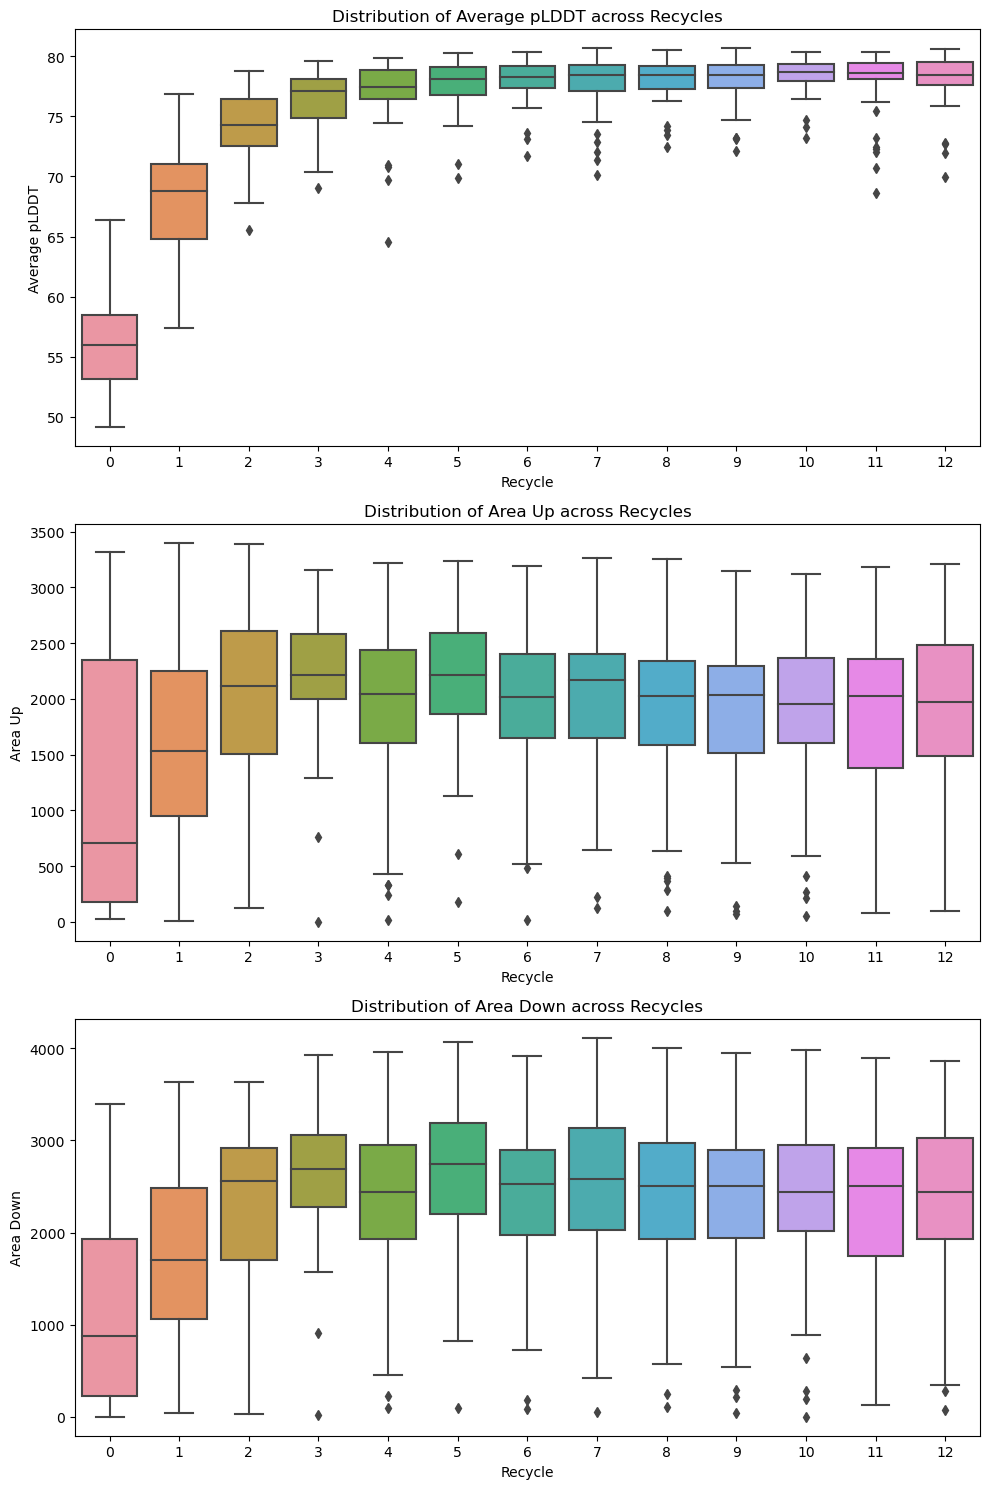

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots to show the distribution of pLDDT, Area Up, and Area Down across recycles
def plot_boxplots(df):
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    # Boxplot for Average pLDDT
    sns.boxplot(ax=axes[0], x='Recycle', y='Average_pLDDT', data=df)
    axes[0].set_title('Distribution of Average pLDDT across Recycles')
    axes[0].set_ylabel('Average pLDDT')

    # Boxplot for Area Up
    sns.boxplot(ax=axes[1], x='Recycle', y='Area_Up', data=df)
    axes[1].set_title('Distribution of Area Up across Recycles')
    axes[1].set_ylabel('Area Up')

    # Boxplot for Area Down
    sns.boxplot(ax=axes[2], x='Recycle', y='Area_Down', data=df)
    axes[2].set_title('Distribution of Area Down across Recycles')
    axes[2].set_ylabel('Area Down')

    plt.tight_layout()
    plt.show()

# Plot the boxplots
plot_boxplots(df)


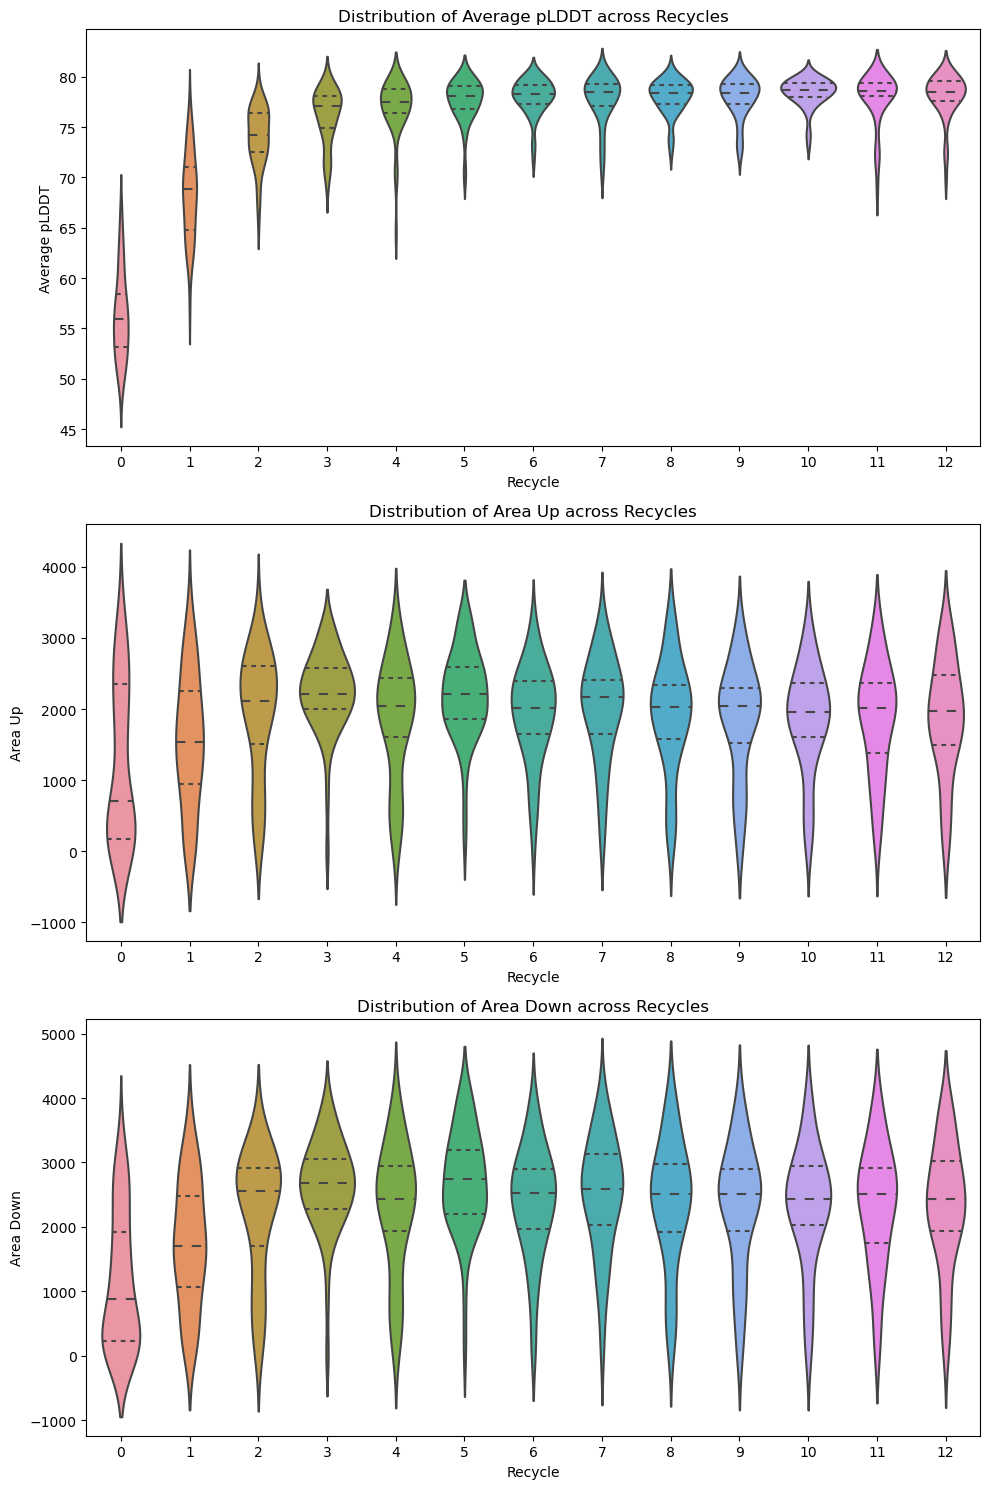

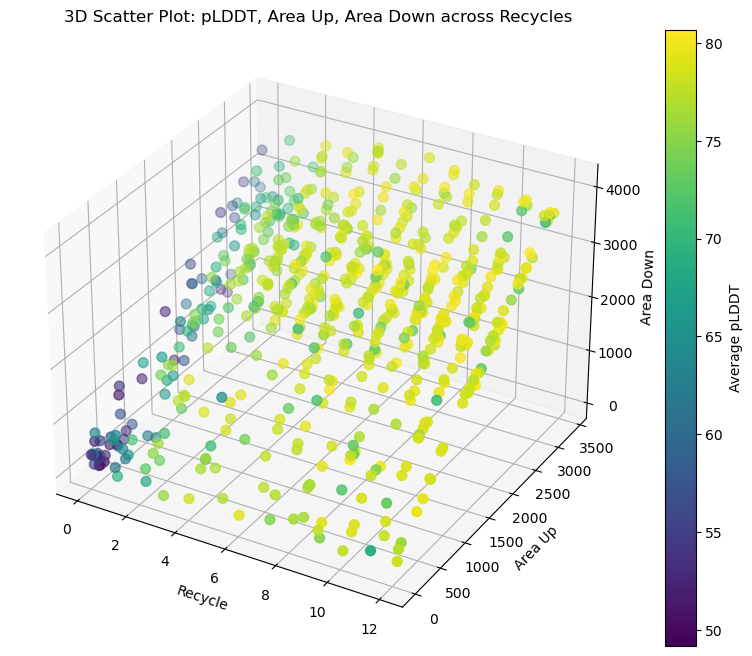

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import re

# Function to extract the recycle number from the filename
def extract_recycle_number(filename):
    pattern = re.compile(r'_r(\d+)_')
    match = pattern.search(filename)
    if match:
        return int(match.group(1))
    return None

# Function to create violin plots for Average pLDDT, Area Up, and Area Down across recycles
def plot_violinplots(df):
    try:
        fig, axes = plt.subplots(3, 1, figsize=(10, 15))

        # Violin plot for Average pLDDT
        sns.violinplot(ax=axes[0], x='Recycle', y='Average_pLDDT', data=df, inner='quartile')
        axes[0].set_title('Distribution of Average pLDDT across Recycles')
        axes[0].set_ylabel('Average pLDDT')

        # Violin plot for Area Up
        sns.violinplot(ax=axes[1], x='Recycle', y='Area_Up', data=df, inner='quartile')
        axes[1].set_title('Distribution of Area Up across Recycles')
        axes[1].set_ylabel('Area Up')

        # Violin plot for Area Down
        sns.violinplot(ax=axes[2], x='Recycle', y='Area_Down', data=df, inner='quartile')
        axes[2].set_title('Distribution of Area Down across Recycles')
        axes[2].set_ylabel('Area Down')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error generating violin plots: {e}")

# Function to create a 3D scatter plot of Average pLDDT, Area Up, and Area Down across recycles
def plot_3d_scatter(df):
    try:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot
        scatter = ax.scatter(df['Recycle'], df['Area_Up'], df['Area_Down'], c=df['Average_pLDDT'], cmap='viridis', s=50)

        # Set labels
        ax.set_xlabel('Recycle')
        ax.set_ylabel('Area Up')
        ax.set_zlabel('Area Down')
        ax.set_title('3D Scatter Plot: pLDDT, Area Up, Area Down across Recycles')

        # Add color bar for pLDDT
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Average pLDDT')

        plt.show()

    except Exception as e:
        print(f"Error generating 3D scatter plot: {e}")

# Assuming you already have the DataFrame with filenames
# Add a 'Recycle' column by extracting the recycle number from the filename
df['Recycle'] = df['Filename'].apply(extract_recycle_number)

# Now call the plotting functions
plot_violinplots(df)
plot_3d_scatter(df)


                     Filename  Model  Recycle  Average_pLDDT      Area_Up  \
84   model_4_ptm_r1_seed0.pdb      1        1      74.835881  1851.319757   
226  model_1_ptm_r1_seed0.pdb      1        1      64.830931  2295.438037   
293  model_5_ptm_r1_seed0.pdb      1        1      71.091096  2506.630500   
351  model_2_ptm_r1_seed0.pdb      1        1      70.704133  2742.302035   
510  model_3_ptm_r1_seed0.pdb      1        1      71.534986   327.890909   
128  model_4_ptm_r1_seed1.pdb      1        1      69.320494  1937.457247   
237  model_1_ptm_r1_seed1.pdb      1        1      61.890236    16.273278   
255  model_5_ptm_r1_seed1.pdb      1        1      74.712894  1520.658676   
357  model_2_ptm_r1_seed1.pdb      1        1      63.453990    44.304420   
508  model_3_ptm_r1_seed1.pdb      1        1      66.075974   940.080804   
167  model_4_ptm_r1_seed2.pdb      1        1      69.303610  1944.638599   
193  model_1_ptm_r1_seed2.pdb      1        1      64.759893  1777.993214   

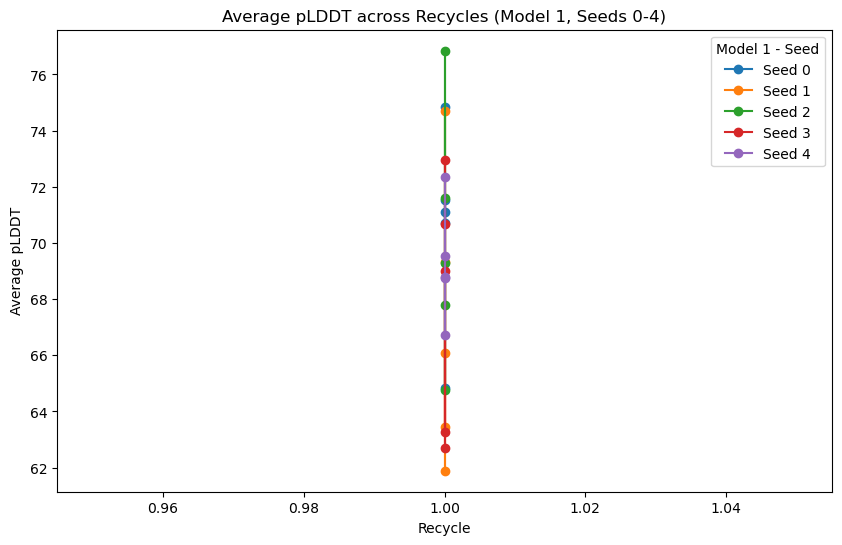

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# Function to extract the recycle number from the filename
def extract_recycle_number(filename):
    pattern = re.compile(r'_r(\d+)_')
    match = pattern.search(filename)
    if match:
        return int(match.group(1))
    return None

# Function to extract the model seed from the filename
def extract_model_seed(filename):
    pattern = re.compile(r'_seed(\d+)\.pdb')
    match = pattern.search(filename)
    if match:
        return int(match.group(1))
    return None

# Function to extract the model number from the filename (if applicable)
def extract_model_number(filename):
    pattern = re.compile(r'_ptm_r(\d+)_')
    match = pattern.search(filename)
    if match:
        return int(match.group(1))
    return None

# Function to create a clean line graph for Model 1, Seeds 0-4 across recycles
def plot_line_graph_model_1_seeds(df):
    # Filter for Model 1 and seeds 0-4
    df_model_1 = df[(df['Model_Number'] == 1) & (df['Model_Seed'].isin([0, 1, 2, 3, 4]))]

    # Ensure data is sorted by Recycle within each seed
    df_model_1 = df_model_1.sort_values(by=['Model_Seed', 'Recycle'])
    print(df_model_1)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Group by Model Seed and plot each seed's data
    for seed, group in df_model_1.groupby('Model_Seed'):
        ax.plot(group['Recycle'], group['Average_pLDDT'], marker='o', label=f'Seed {seed}')

    ax.set_title('Average pLDDT across Recycles (Model 1, Seeds 0-4)')
    ax.set_xlabel('Recycle')
    ax.set_ylabel('Average pLDDT')
    ax.legend(title='Model 1 - Seed')

    plt.show()

# Assuming you already have the DataFrame with filenames
# Add 'Recycle', 'Model_Seed', and 'Model_Number' columns by extracting information from the filename
df['Recycle'] = df['Filename'].apply(extract_recycle_number)
df['Model_Seed'] = df['Filename'].apply(extract_model_seed)
df['Model_Number'] = df['Filename'].apply(extract_model_number)

# Call the plotting function for Model 1, Seeds 0-4
plot_line_graph_model_1_seeds(df)


In [31]:
df_model_1

,Filename,Model,Recycle,Average_pLDDT,Area_Up,Area_Down,Model_Seed,Model_Number
7,model_3_ptm_r9_seed4.pdb,9,9,72.640695,123.680764,13.398557,4,9
15,model_3_ptm_r2_seed0.pdb,2,2,58.161791,630.727888,369.657187,0,2
25,model_3_ptm_r2_seed1.pdb,2,2,61.316683,1333.382018,1315.138219,1,2
42,model_3_ptm_r4_seed4.pdb,4,4,67.021053,565.642424,155.588227,4,4
59,model_3_ptm_r2_seed3.pdb,2,2,51.770630,402.401255,333.237076,3,2
...,...,...,...,...,...,...,...,...
571,model_3_ptm_r7_seed0.pdb,7,7,72.091433,678.988444,221.970718,0,7
603,model_3_ptm_r7_seed1.pdb,7,7,74.578388,1757.745292,1732.673598,1,7
616,model_3_ptm_r7_seed3.pdb,7,7,74.743274,2358.003109,2857.832313,3,7
625,model_3_ptm_r1_seed4.pdb,1,1,51.247615,92.520586,168.006860,4,1


In [32]:
# Print the entire DataFrame to see the distribution of Recycle values
print(df[['Filename', 'Model_Number', 'Recycle', 'Average_pLDDT']].head(50))

# Check unique Recycle values to see if all are captured
print("Unique Recycle values:", df['Recycle'].unique())

# Check unique Model_Number values to see if all are captured
print("Unique Model_Number values:", df['Model_Number'].unique())


                     Filename  Model_Number  Recycle  Average_pLDDT
0    model_2_ptm_r3_seed1.pdb             3        3      77.634570
1    model_3_ptm_r4_seed7.pdb             4        4      77.192844
2    model_4_ptm_r1_seed6.pdb             1        1      73.430867
3    model_5_ptm_r6_seed0.pdb             6        6      78.289692
4   model_5_ptm_r11_seed2.pdb            11       11      79.996275
5   model_4_ptm_r11_seed4.pdb            11       11      78.495974
6    model_1_ptm_r0_seed3.pdb             0        0      50.963159
7    model_3_ptm_r9_seed4.pdb             9        9      80.208138
8    model_5_ptm_r5_seed8.pdb             5        5      76.764792
9    model_2_ptm_r0_seed9.pdb             0        0      52.642693
10  model_1_ptm_r11_seed7.pdb            11       11      78.166827
11   model_2_ptm_r8_seed5.pdb             8        8      76.420938
12   model_1_ptm_r6_seed4.pdb             6        6      77.157056
13   model_5_ptm_r0_seed7.pdb             0     

                     Filename  Model_Number  Recycle  Average_pLDDT
0    model_2_ptm_r3_seed1.pdb             3        3      77.634570
1    model_3_ptm_r4_seed7.pdb             4        4      77.192844
2    model_4_ptm_r1_seed6.pdb             1        1      73.430867
3    model_5_ptm_r6_seed0.pdb             6        6      78.289692
4   model_5_ptm_r11_seed2.pdb            11       11      79.996275
5   model_4_ptm_r11_seed4.pdb            11       11      78.495974
6    model_1_ptm_r0_seed3.pdb             0        0      50.963159
7    model_3_ptm_r9_seed4.pdb             9        9      80.208138
8    model_5_ptm_r5_seed8.pdb             5        5      76.764792
9    model_2_ptm_r0_seed9.pdb             0        0      52.642693
10  model_1_ptm_r11_seed7.pdb            11       11      78.166827
11   model_2_ptm_r8_seed5.pdb             8        8      76.420938
12   model_1_ptm_r6_seed4.pdb             6        6      77.157056
13   model_5_ptm_r0_seed7.pdb             0     

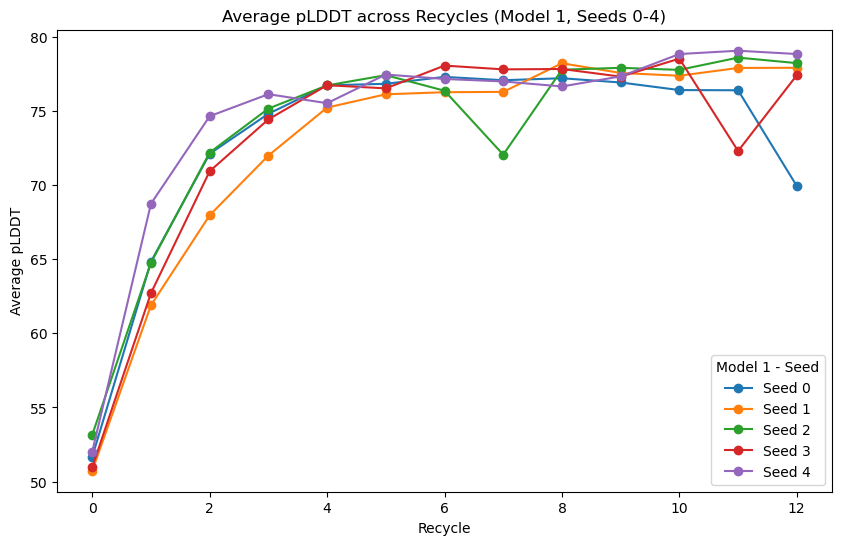

In [33]:
# Check the full DataFrame before filtering for Model 1 to ensure all recycles are there
print(df[['Filename', 'Model_Number', 'Recycle', 'Average_pLDDT']].head(50))
# Correct the filtering to capture only Model 1 across all recycles and seeds 0-4
df_model_1 = df[(df['Filename'].str.contains('model_1_')) & (df['Model_Seed'].isin([0, 1, 2, 3, 4]))]

# Print the filtered DataFrame to verify
print("Filtered Data (Model 1):")
print(df_model_1[['Filename', 'Model_Seed', 'Recycle', 'Average_pLDDT']])

# Ensure the filtering is now correct, including multiple recycles
print("Unique Recycle values in Model 1:", df_model_1['Recycle'].unique())

# Plotting function remains the same
def plot_line_graph_model_1_seeds(df_model_1):
    # Ensure data is sorted by Recycle within each seed
    df_model_1 = df_model_1.sort_values(by=['Model_Seed', 'Recycle'])

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Group by Model Seed and plot each seed's data
    for seed, group in df_model_1.groupby('Model_Seed'):
        ax.plot(group['Recycle'], group['Average_pLDDT'], marker='o', label=f'Seed {seed}')

    ax.set_title('Average pLDDT across Recycles (Model 1, Seeds 0-4)')
    ax.set_xlabel('Recycle')
    ax.set_ylabel('Average pLDDT')
    ax.legend(title='Model 1 - Seed')

    plt.show()

# Now call the plotting function
plot_line_graph_model_1_seeds(df_model_1)


Filtered Data (Model 1) including Area Up and Area Down:
                     Filename  Model_Seed  Recycle  Average_pLDDT  \
7    model_3_ptm_r9_seed4.pdb           4        9      80.208138   
15   model_3_ptm_r2_seed0.pdb           0        2      77.210330   
25   model_3_ptm_r2_seed1.pdb           1        2      73.737944   
42   model_3_ptm_r4_seed4.pdb           4        4      78.080544   
59   model_3_ptm_r2_seed3.pdb           3        2      76.881261   
..                        ...         ...      ...            ...   
571  model_3_ptm_r7_seed0.pdb           0        7      79.485007   
603  model_3_ptm_r7_seed1.pdb           1        7      78.312643   
616  model_3_ptm_r7_seed3.pdb           3        7      80.017371   
625  model_3_ptm_r1_seed4.pdb           4        1      68.789312   
644  model_3_ptm_r7_seed2.pdb           2        7      80.194312   

         Area_Up    Area_Down  
7    1584.450879  1941.078162  
15    850.521692  1006.042552  
25   1504.172256  

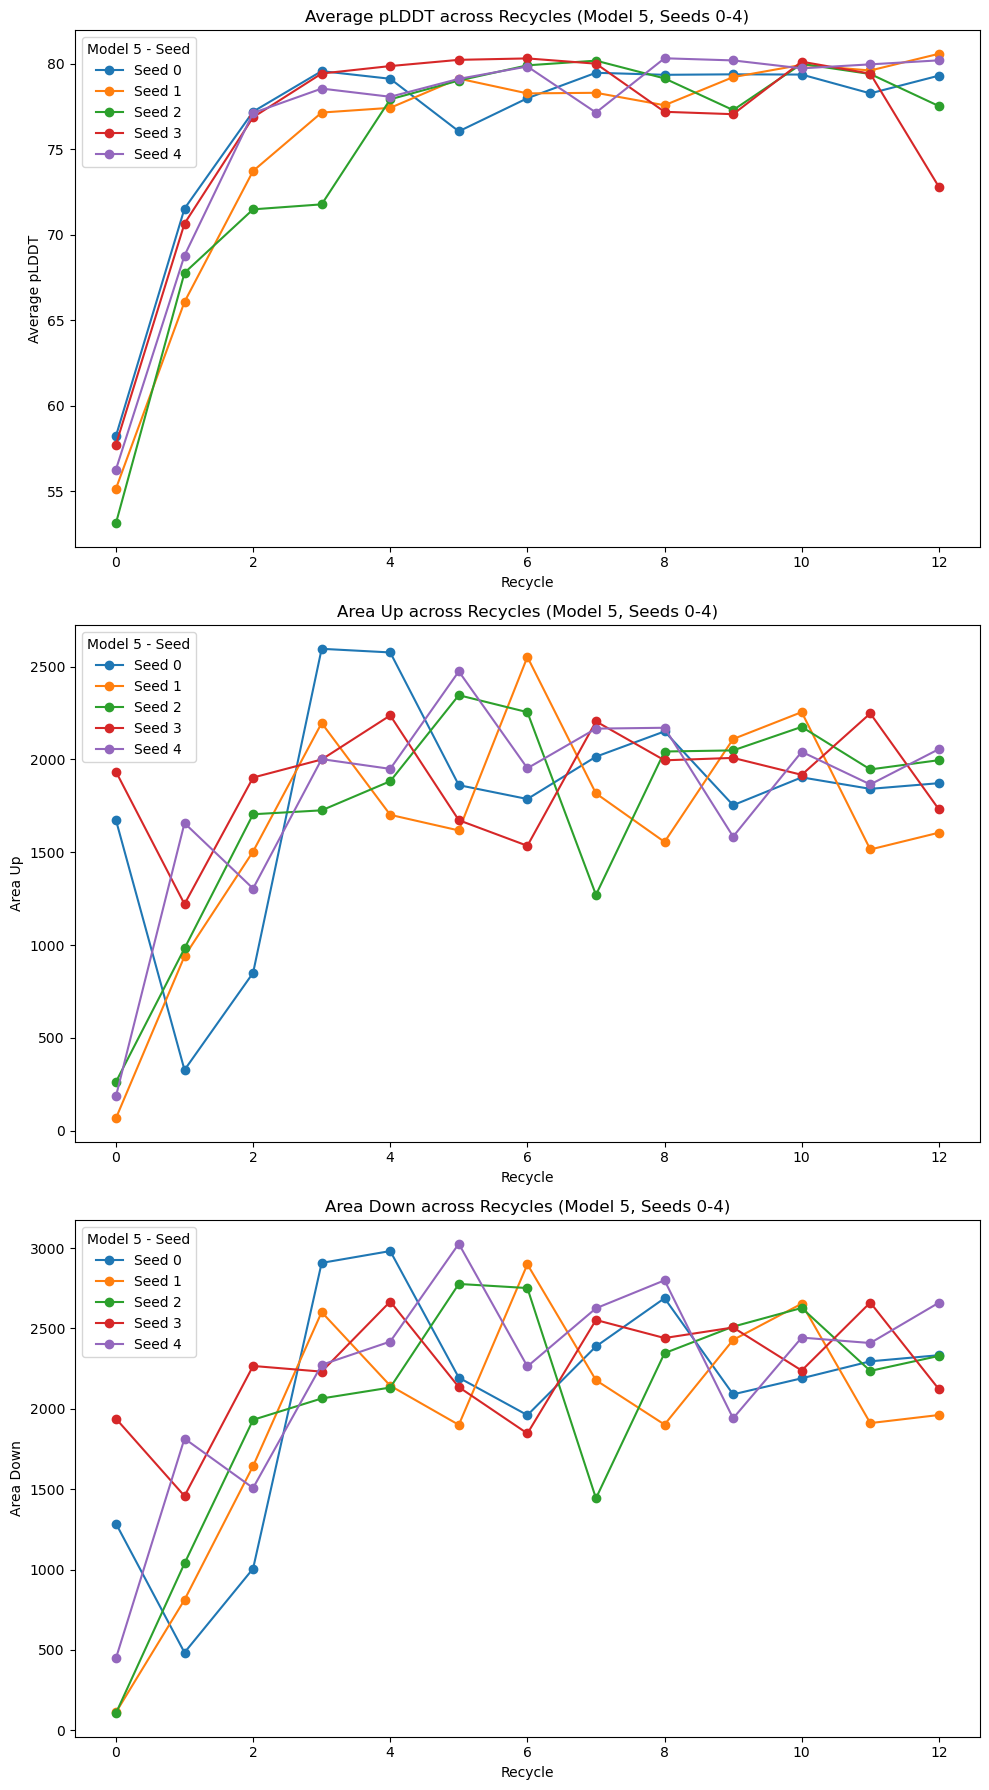

In [34]:
# Correct the filtering to capture only Model 1 across all recycles and seeds 0-4
df_model_1 = df[(df['Filename'].str.contains('model_3_')) & (df['Model_Seed'].isin([0, 1, 2, 3, 4]))]

# Print the filtered DataFrame to verify
print("Filtered Data (Model 1) including Area Up and Area Down:")
print(df_model_1[['Filename', 'Model_Seed', 'Recycle', 'Average_pLDDT', 'Area_Up', 'Area_Down']])

# Ensure the filtering is now correct, including multiple recycles
print("Unique Recycle values in Model 1:", df_model_1['Recycle'].unique())

# Function to plot the line graph for pLDDT, Area Up, and Area Down
def plot_line_graph_model_1_seeds(df_model_1):
    # Ensure data is sorted by Recycle within each seed
    df_model_1 = df_model_1.sort_values(by=['Model_Seed', 'Recycle'])

    # Plot
    fig, axes = plt.subplots(3, 1, figsize=(10, 18))

    # Group by Model Seed and plot each seed's data for Average pLDDT
    for seed, group in df_model_1.groupby('Model_Seed'):
        axes[0].plot(group['Recycle'], group['Average_pLDDT'], marker='o', label=f'Seed {seed}')
    axes[0].set_title('Average pLDDT across Recycles (Model 5, Seeds 0-4)')
    axes[0].set_xlabel('Recycle')
    axes[0].set_ylabel('Average pLDDT')

    # Plot for Area Up across recycles
    for seed, group in df_model_1.groupby('Model_Seed'):
        axes[1].plot(group['Recycle'], group['Area_Up'], marker='o', label=f'Seed {seed}')
    axes[1].set_title('Area Up across Recycles (Model 5, Seeds 0-4)')
    axes[1].set_xlabel('Recycle')
    axes[1].set_ylabel('Area Up')

    # Plot for Area Down across recycles
    for seed, group in df_model_1.groupby('Model_Seed'):
        axes[2].plot(group['Recycle'], group['Area_Down'], marker='o', label=f'Seed {seed}')
    axes[2].set_title('Area Down across Recycles (Model 5, Seeds 0-4)')
    axes[2].set_xlabel('Recycle')
    axes[2].set_ylabel('Area Down')

    # Add legends
    for ax in axes:
        ax.legend(title='Model 5 - Seed')

    plt.tight_layout()
    plt.show()

# Now call the plotting function for Model 1, Seeds 0-4
plot_line_graph_model_1_seeds(df_model_1)
